# Stroke Prediction 

### Data Sci./   Mohamed Adel Hosny

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient


| Parameters  | Description |
| --- | :---  |
| `id` | unique identifier |
| `gender` | "Male", "Female" or "Other" |
| `age` | age of the patient |
| `hypertension` | 0 if the patient doesn't have hypertension, 1 if the patient has hypertension |
| `heart_disease` | 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease |
| `ever_married` | "No" or "Yes" |
| `work_type` | "children", "Govt_jov", "Never_worked", "Private" or "Self-employed" |
| `Residence_type` | "Rural" or "Urban" |
| `avg_glucose_level` | average glucose level in blood |
| `bmi` | body mass index |
| `smoking_status` | "formerly smoked", "never smoked", "smokes" or "Unknown"* |
| `stroke` | 1 if the patient had a stroke or 0 if not |

   * Note: "Unknown" in smoking_status means that the information is unavailable for this patient

---

## Introduction of data 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dt=pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
dt.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
dt.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

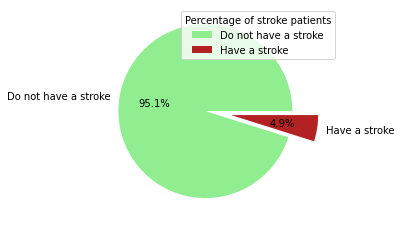

In [6]:
dt_target_recoured=dt['stroke'].astype('int32')
dt_target_recoured.value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(dt_target_recoured.value_counts() , labels = ['Do not have a stroke' , 'Have a stroke'] , autopct='%1.1f%%', 
        colors=['lightgreen','firebrick'] , explode=(0.3,0) )

plt.legend(title = "Percentage of stroke patients" )
plt.show() 

>```
 Imbalanced problem in data. ```

In [7]:
dt_target_recoured.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [8]:
dt.describe(include='object')

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [9]:
dt.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [10]:
dt.describe().T['50%']/dt.describe().T['mean']

id                   1.011342
age                  1.041025
hypertension         0.000000
heart_disease        0.000000
avg_glucose_level    0.865634
bmi                  0.972546
stroke               0.000000
dtype: float64

####  NaN percentage on the Data 

In [11]:
dt.shape

(5110, 12)

In [12]:
dt.dropna().shape[0]

4909

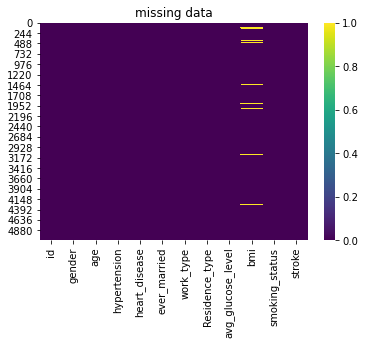

In [13]:
dt.isnull().sum()
sns.heatmap(dt.isnull(),cmap='viridis')

plt.title('missing data')
plt.show()

Percentage of NaN values (%)

In [14]:
dt.isna().sum()*100/dt.shape[0] 

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

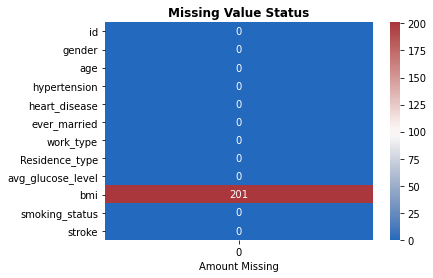

In [15]:
plt.title('Missing Value Status',fontweight='bold')
ax = sns.heatmap(dt.isna().sum().to_frame(),annot=True,fmt='d',cmap='vlag')
ax.set_xlabel('Amount Missing')
plt.show()

#### Fill NaN values

In [16]:
dt['bmi'].interpolate(inplace=True)

In [17]:
dt.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [18]:
dt.shape #after removing NaN values

(5110, 12)

In [19]:
dt['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

As "Unknown" values in smoking_status parameter is about 25% of the data, we can consider it as a seprate condition of patient that did not varify his smoking state.

----

## Analysing Data :

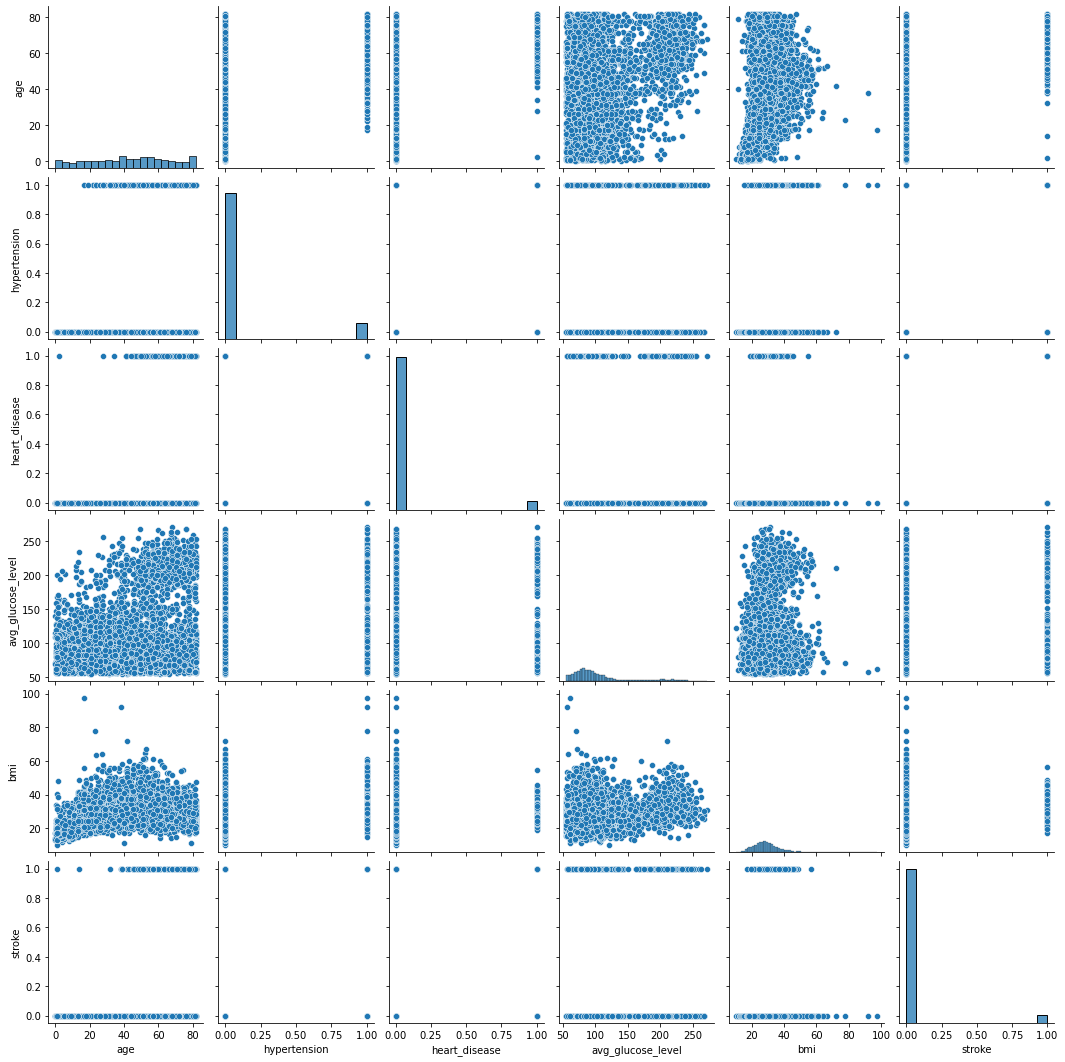

In [20]:
sns.pairplot(data=dt.drop(['id'], axis=1))

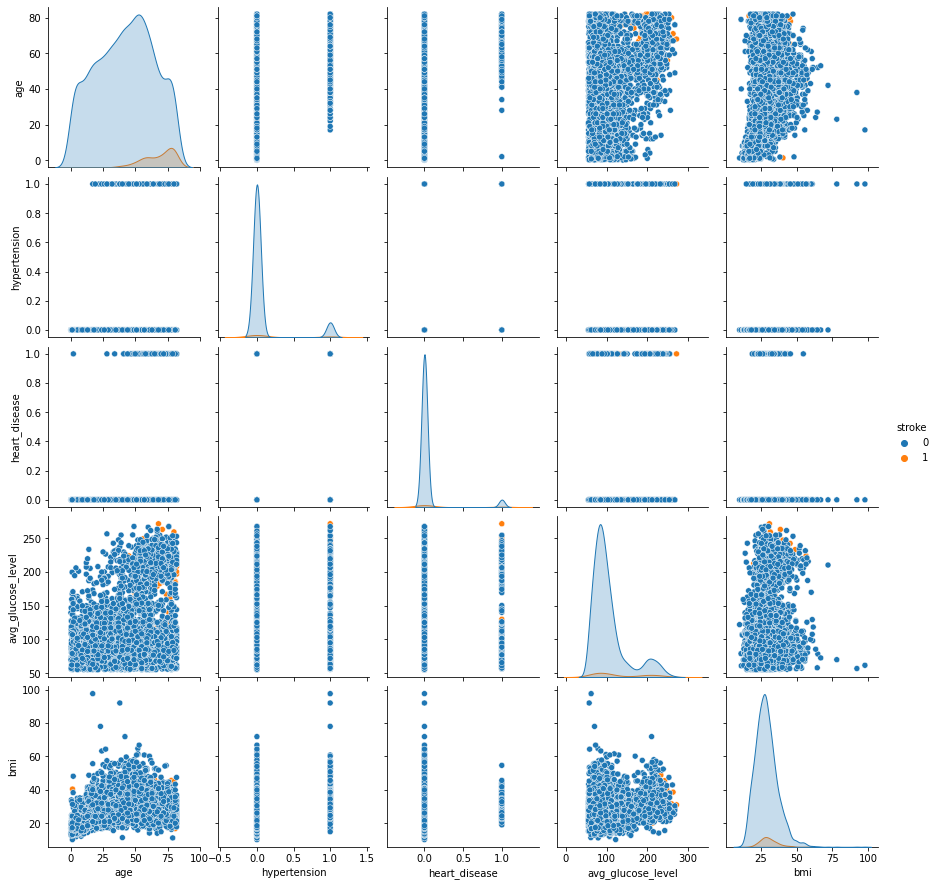

In [21]:
sns.pairplot(data=dt.drop(['id'], axis=1),hue="stroke")

---

### Outliers Check

<function matplotlib.pyplot.show(close=None, block=None)>

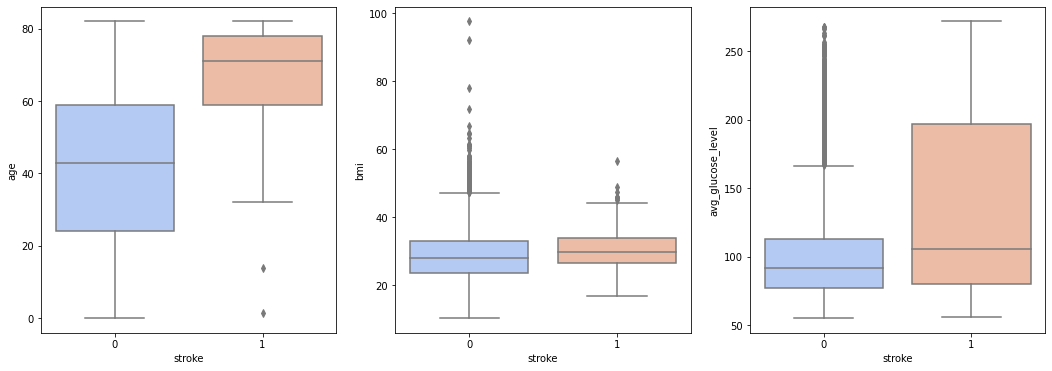

In [22]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (18, 6) , squeeze=True)

sns.boxplot(data=dt,y=dt['age'],x=dt['stroke'],palette='coolwarm' , ax=axes[0])
sns.boxplot(data=dt,y=dt['bmi'],x=dt['stroke'],palette='coolwarm' , ax=axes[1])
sns.boxplot(data=dt,y=dt['avg_glucose_level'],x=dt['stroke'],palette='coolwarm' , ax=axes[2])

plt.show

In [23]:
dt[dt['bmi']>70]['bmi'].count()

4

In [24]:
100*4/5110

0.07827788649706457

There is small outliers to can eliminates as they are less than 0.5% of the data.

In [25]:
dt.drop(dt[dt['bmi'] > 70].index, inplace = True)

In [26]:
dt.shape #after removing outliers

(5106, 12)

---

### Comparing the values of the patients have stroke or not with different parameters 

In [27]:
dt.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

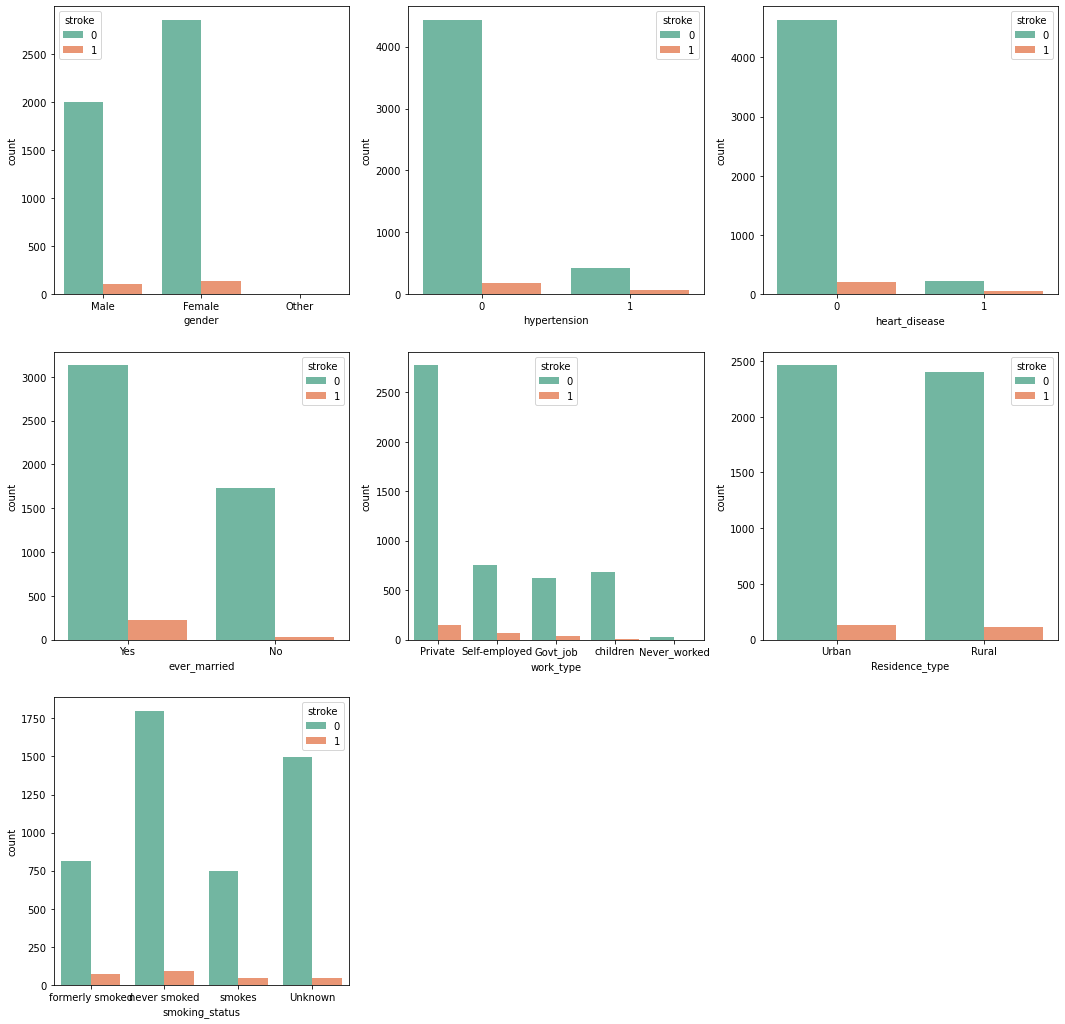

In [28]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (18, 18))
fig.delaxes( ax=axes[2,1])
fig.delaxes( ax=axes[2,2])
sns.countplot(x="gender", hue='stroke', palette='Set2', data=dt , ax=axes[0,0])
sns.countplot(x="hypertension", hue='stroke', palette="Set2", data=dt , ax=axes[0,1])
sns.countplot(x="heart_disease", hue='stroke', palette="Set2", data=dt , ax=axes[0,2])
sns.countplot(x="ever_married", hue='stroke', palette="Set2", data=dt , ax=axes[1,0])
sns.countplot(x="work_type", hue='stroke', palette="Set2", data=dt , ax=axes[1,1])
sns.countplot(x="Residence_type", hue='stroke', palette="Set2", data=dt , ax=axes[1,2])
sns.countplot(x="smoking_status", hue='stroke', palette="Set2", data=dt , ax=axes[2,0])
plt.show()

#### Gender

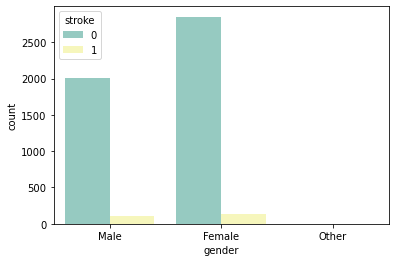

In [29]:
sns.countplot(x="gender", hue='stroke', palette='Set3', data=dt )
plt.show()

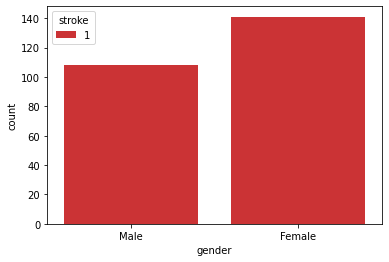

In [30]:
dt1=dt[dt["stroke"].isin([1])]
sns.countplot(x="gender", hue='stroke', palette='Set1', data=dt1 )
plt.show()

#### Avg_glucose_level

For people who have average glucose level lower than 150 can be considered as a separate category (Normal Patients) while who have more than 150 can be considered as (Diabetes patients).  

In [31]:
dt.shape

(5106, 12)

In [32]:
dt[dt["avg_glucose_level"]>150].shape[0] , dt[dt["avg_glucose_level"]<150].shape[0]

(729, 4376)

In [33]:
print("Persentage of Diabetes Patients", "" , round(dt[dt["avg_glucose_level"]>=150].shape[0]*100/dt.shape[0],2),"%")
print("Persentage of Normal Patients"  ,"  ", round(dt[dt["avg_glucose_level"]<150].shape[0]*100/dt.shape[0],2),"%")

Persentage of Diabetes Patients  14.3 %
Persentage of Normal Patients    85.7 %


<AxesSubplot:xlabel='avg_glucose_level', ylabel='bmi'>

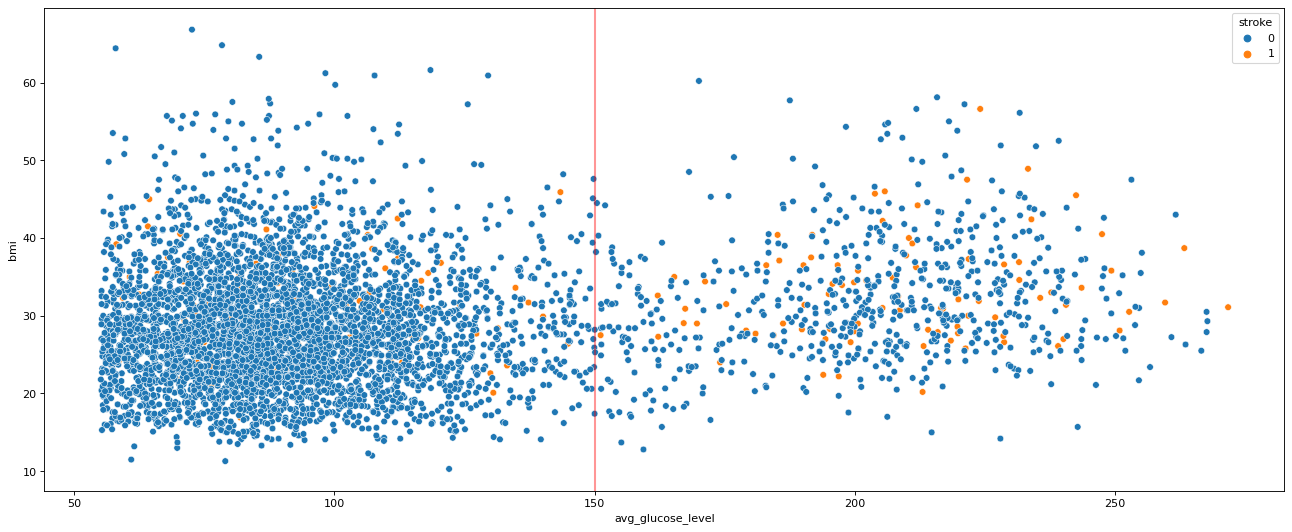

In [34]:
plt.figure(figsize=(20, 8), dpi=80)
plt.axvspan(149.9, 150, color='red', alpha=0.3)
sns.scatterplot(data=dt,y=dt['bmi'],x=dt['avg_glucose_level'],hue=dt['stroke'])

<AxesSubplot:xlabel='avg_glucose_level', ylabel='bmi'>

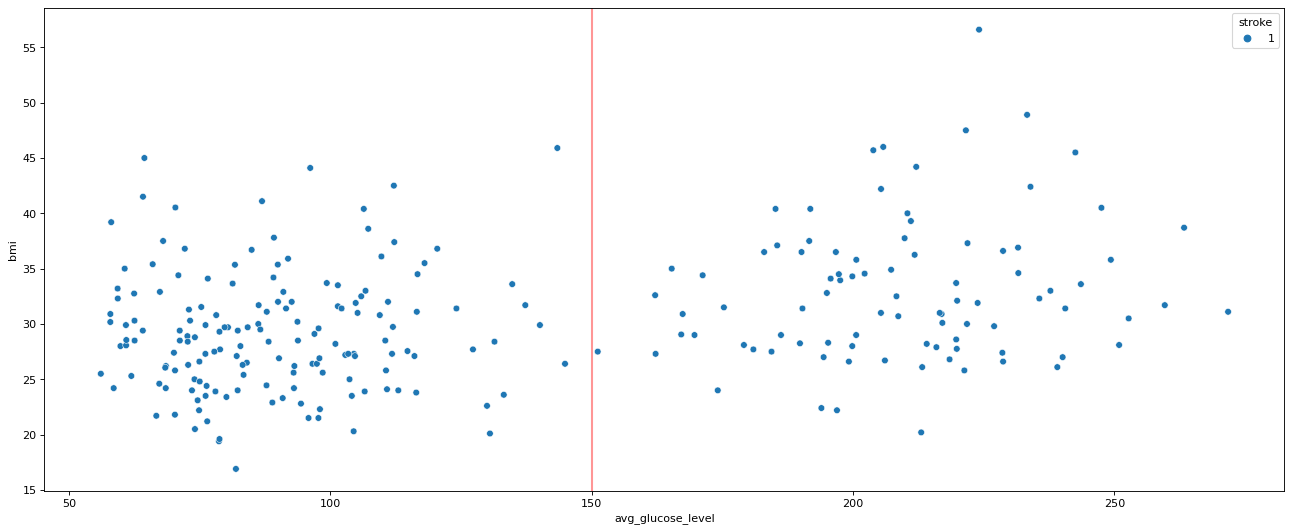

In [35]:
dt1=dt[dt["stroke"].isin([1])]
plt.figure(figsize=(20, 8), dpi=80)
plt.axvspan(149.9, 150, color='red', alpha=0.3)
sns.scatterplot(data=dt1,y=dt1['bmi'],x=dt1['avg_glucose_level'],hue=dt1['stroke'])

<AxesSubplot:xlabel='avg_glucose_level', ylabel='age'>

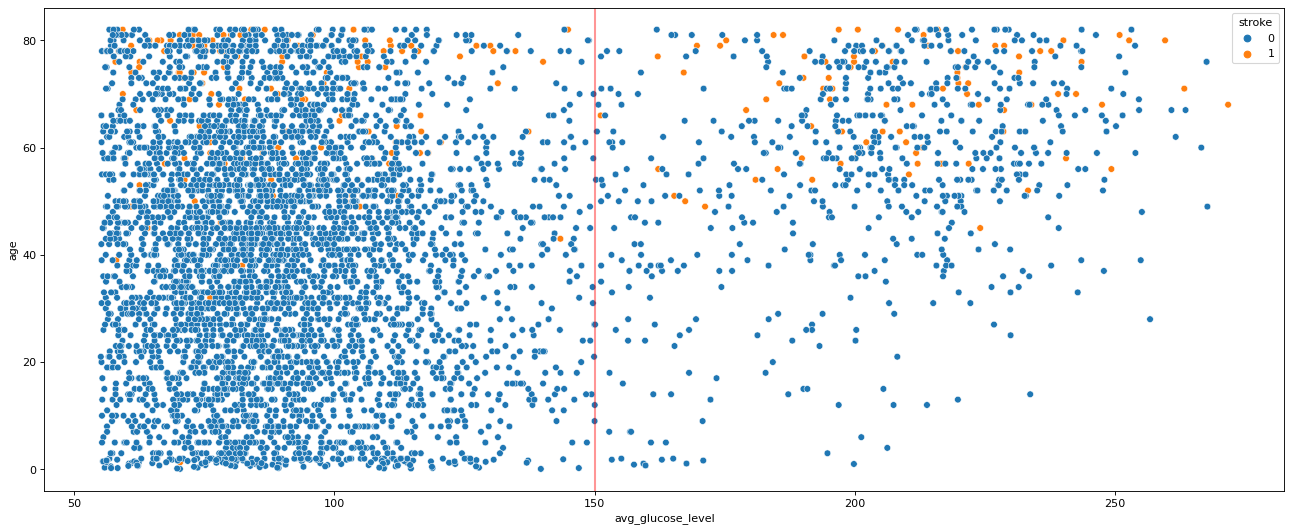

In [36]:
plt.figure(figsize=(20, 8), dpi=80)
plt.axvspan(149.9, 150, color='red', alpha=0.3)
sns.scatterplot(data=dt,y=dt['age'],x=dt['avg_glucose_level'],hue=dt['stroke'])

<AxesSubplot:xlabel='avg_glucose_level', ylabel='age'>

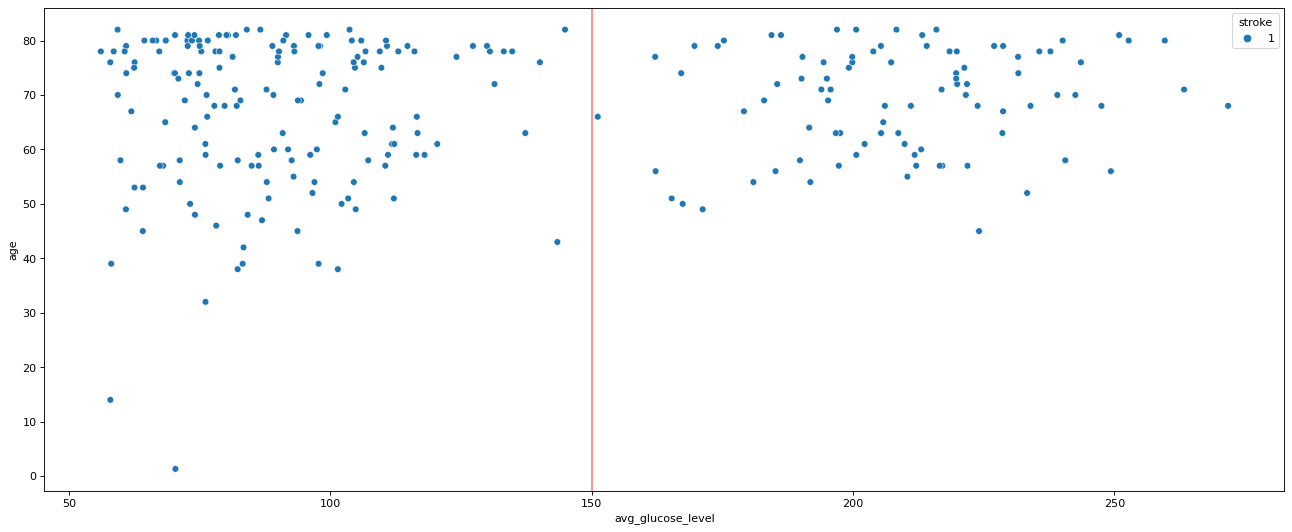

In [37]:
dt1=dt[dt["stroke"].isin([1])]
plt.figure(figsize=(20, 8), dpi=80)
plt.axvspan(149.9, 150, color='red', alpha=0.3)
sns.scatterplot(data=dt1,y=dt1['age'],x=dt1['avg_glucose_level'],hue=dt1['stroke'])

<AxesSubplot:title={'center':'Diabetes Patient avg_glucose_level >= 150'}, xlabel='avg_glucose_level', ylabel='Count'>

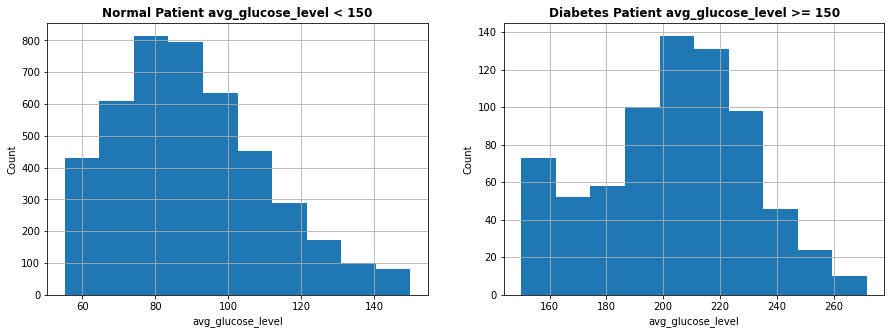

In [38]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))

axes[0].set_title('Normal Patient avg_glucose_level < 150' , fontsize = 12, fontweight ='bold')
axes[0].set_xlabel('avg_glucose_level')
axes[0].set_ylabel('Count')
dt[dt.avg_glucose_level < 150].avg_glucose_level.hist(bins = 10, ax = axes[0])

axes[1].set_title('Diabetes Patient avg_glucose_level >= 150' , fontsize = 12, fontweight ='bold')
axes[1].set_xlabel('avg_glucose_level')
axes[1].set_ylabel('Count')
dt[dt.avg_glucose_level >= 150].avg_glucose_level.hist(bins = 10, ax = axes[1])

<ipython-input-39-d0ba830d0a3c>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dt1[dt.avg_glucose_level < 150].avg_glucose_level.hist(bins = 10, ax = axes[0])
<ipython-input-39-d0ba830d0a3c>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dt1[dt.avg_glucose_level >= 150].avg_glucose_level.hist(bins = 10, ax = axes[1])


<AxesSubplot:title={'center':'Diabetes Patient avg_glucose_level >= 150'}, xlabel='avg_glucose_level', ylabel='Count'>

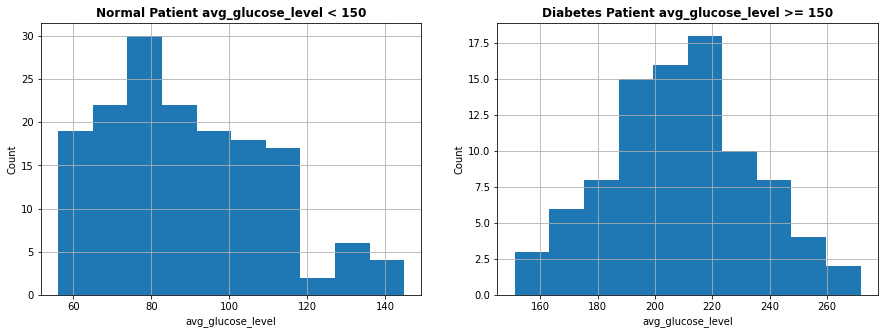

In [39]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))

axes[0].set_title('Normal Patient avg_glucose_level < 150' , fontsize = 12, fontweight ='bold')
axes[0].set_xlabel('avg_glucose_level')
axes[0].set_ylabel('Count')
dt1[dt.avg_glucose_level < 150].avg_glucose_level.hist(bins = 10, ax = axes[0])

axes[1].set_title('Diabetes Patient avg_glucose_level >= 150' , fontsize = 12, fontweight ='bold')
axes[1].set_xlabel('avg_glucose_level')
axes[1].set_ylabel('Count')
dt1[dt.avg_glucose_level >= 150].avg_glucose_level.hist(bins = 10, ax = axes[1])

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 400x400 with 0 Axes>

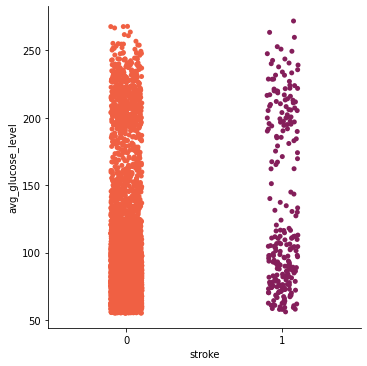

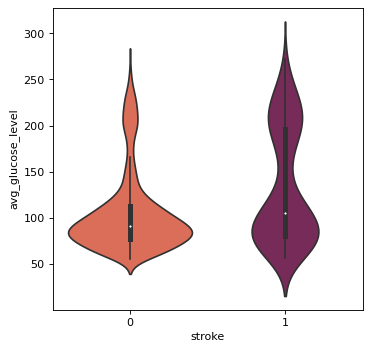

In [40]:
plt.figure(figsize=(5,5), dpi=80)
sns.catplot(data=dt,y=dt['avg_glucose_level'],x=dt['stroke'],palette='rocket_r')
plt.figure(figsize=(5,5), dpi=80)
sns.violinplot(data=dt,y=dt['avg_glucose_level'],x=dt['stroke'],palette='rocket_r')
plt.show

>``` For the Avg_glucose_level graph, the boxplot indicates that the spread of the stroke patients across the Avg_glucose_level parameter is wide however the most of the collected data (about 85% of data) is below 150 mg/dl(Milligrams per decilitre).
Which hints us that stroge relation of high Avg_glucose_level have higher propability to have a stroke. ```

---

#### BMI ( Body Mass Index )

BMI parameter can be divided into four categories [ Under_weight / Normal_weight / Over_weight / Obese  ] , each have limits accordint to BMI values as represented in the graph below.

The Categories of BMI :
  - Under_weight     ( BMI < 18.5 )
  - Normal_weight    ( 18.5 < BMI < 25 )
  - Over_weight      ( 25 < BMI < 30 )
  - Obese            ( BMI > 30 )

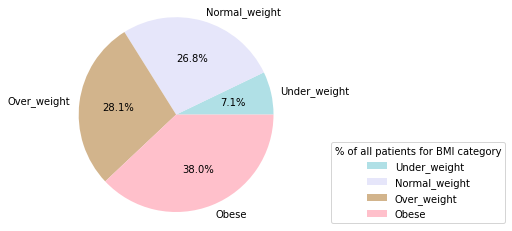

In [41]:
fig1, ax1 = plt.subplots()
ax1.pie(x=[dt[dt['bmi'] <= 18.5]['stroke'].value_counts()[0] , 
   dt[(dt['bmi'] <= 25) & (dt['bmi'] > 18)]['stroke'].value_counts()[0] , 
   dt[(dt['bmi'] <= 30) & (dt['bmi'] > 25)]['stroke'].value_counts()[0] , 
   dt[dt['bmi'] > 30]['stroke'].value_counts()[0] ], 
    labels=['Under_weight','Normal_weight','Over_weight','Obese'] , 
    pctdistance=0.6 , radius=6  , autopct='%1.1f%%' , 
    colors=['powderblue','lavender','tan','pink'] )

ax1.axis('equal')
plt.legend(title = "% of all patients for BMI category" , loc=1 , bbox_to_anchor=(1.5, 0.4))
plt.show() 

 The division od sample of patients on the four categories of BMI.

<Figure size 1800x864 with 0 Axes>

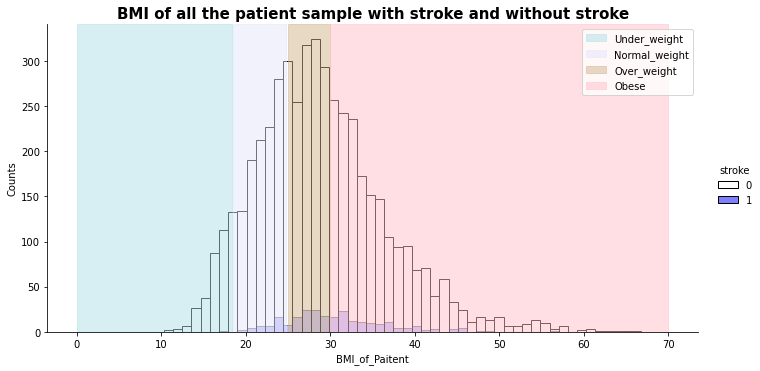

In [42]:
plt.figure(figsize=[25,12])
sns.displot(data=dt,x='bmi',hue='stroke' , aspect=2 , palette='flag' )
plt.title('BMI of all the patient sample with stroke and without stroke' , fontsize = 15, fontweight ='bold')
plt.axvspan(0, 18.4, color='powderblue', alpha=0.5)
plt.axvspan(18.5, 24.8, color='lavender', alpha=0.5)
plt.axvspan(25, 29.9, color='tan', alpha=0.5)
plt.axvspan(30, 70, color='pink', alpha=0.5)

plt.xlabel('BMI_of_Paitent')
plt.ylabel('Counts')
plt.legend(labels=['Under_weight','Normal_weight','Over_weight','Obese'])

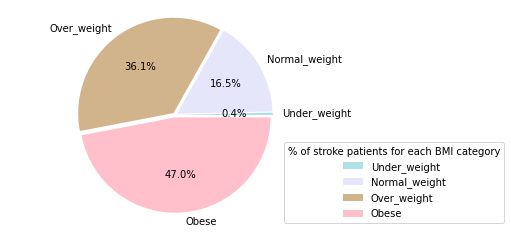

In [43]:
fig1, ax1 = plt.subplots()
ax1.pie(x=[dt[dt['bmi'] <= 18.5]['stroke'].value_counts()[1] , 
   dt[(dt['bmi'] <= 25) & (dt['bmi'] > 18)]['stroke'].value_counts()[1] , 
   dt[(dt['bmi'] <= 30) & (dt['bmi'] > 25)]['stroke'].value_counts()[1] , 
   dt[dt['bmi'] > 30]['stroke'].value_counts()[1] ], 
    labels=['Under_weight','Normal_weight','Over_weight','Obese'] , 
    pctdistance=0.6 , radius=6 , explode=(0.15, 0.15, 0.15, 0.15) , autopct='%1.1f%%' ,
    colors=['powderblue','lavender','tan','pink'] )


ax1.axis('equal')
plt.legend(title = "% of stroke patients for each BMI category" , loc=1 , bbox_to_anchor=(1.5, 0.4))
plt.show() 

>``` The stroke is dependes on the Body mass index as we see from the above charts, the most of the stroke patients are who have over weight and there BMI is more than 25. ```

#### Age Analysis

For analysing the age of patients, I have clasified data for 5 years interval to can have a conclosion on every half decade.

In [44]:
dt['age'].sort_values()

1614     0.08
3295     0.08
3968     0.16
3618     0.16
4021     0.16
        ...  
767     82.00
3316    82.00
3400    82.00
1515    82.00
670     82.00
Name: age, Length: 5106, dtype: float64

In [45]:
dt2=pd.DataFrame.copy(dt)
bins=[0,10,20,30,40,50,60,70,80,90]
labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90']
dt2['decade']=pd.cut(dt['age'],bins=bins,labels=labels)

In [46]:
dt2.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,decade
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1,60-70
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,34.55,never smoked,1,60-70
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1,70-80
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40,smokes,1,40-50
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1,70-80


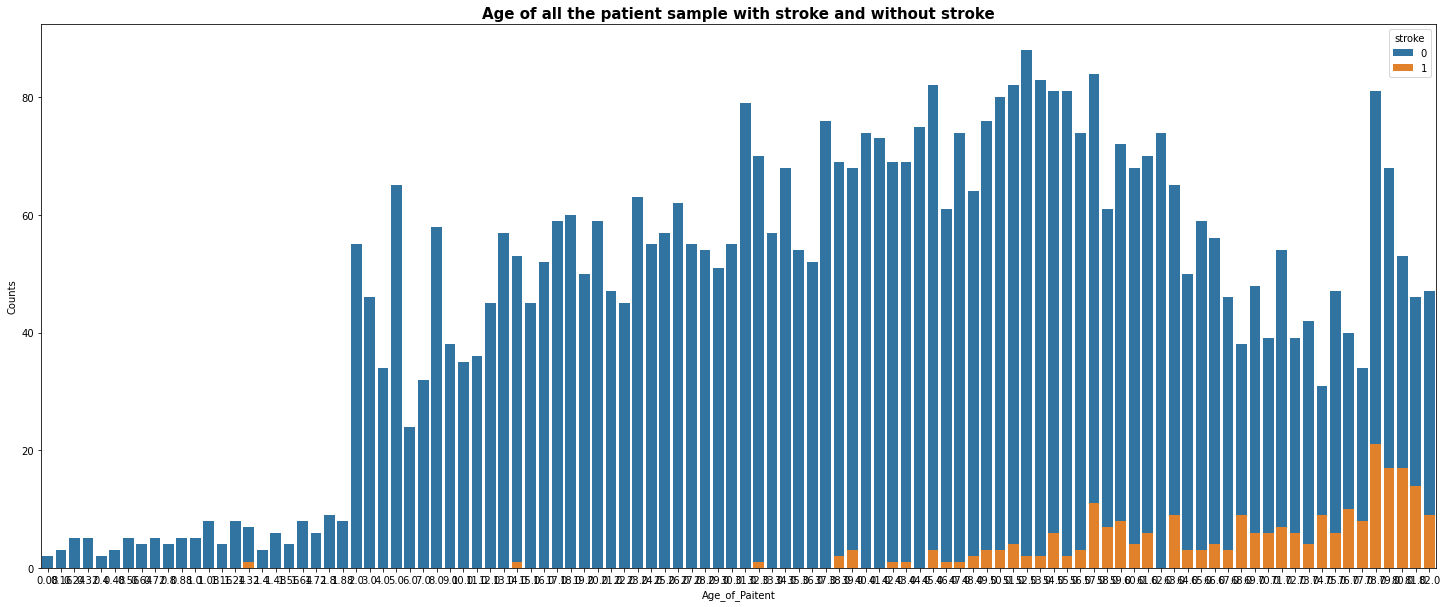

In [47]:
plt.figure(figsize=[25,10])
sns.countplot(data=dt.sort_values('age'),x='age',hue='stroke',dodge=False);
plt.title('Age of all the patient sample with stroke and without stroke' , fontsize = 15, fontweight ='bold');
plt.xlabel('Age_of_Paitent')
plt.ylabel('Counts')
plt.show()

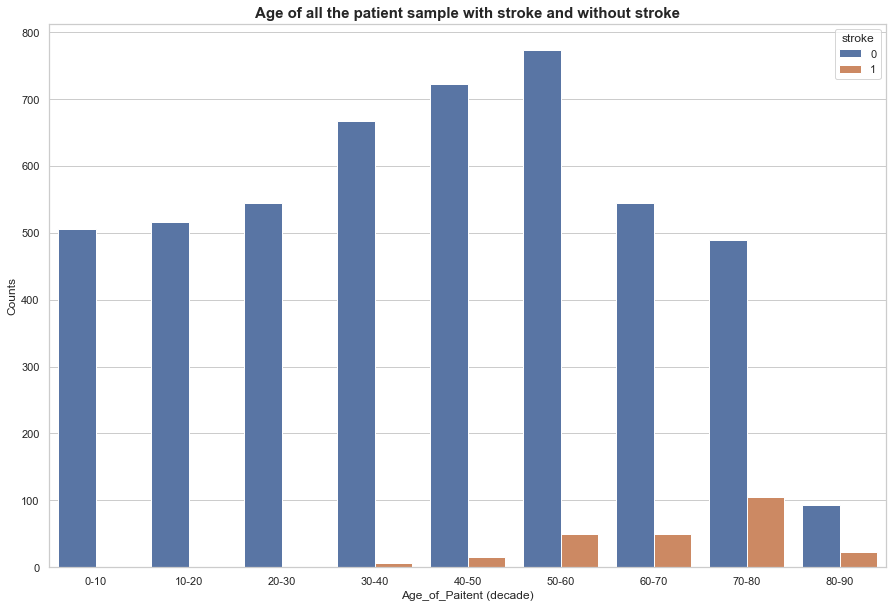

In [48]:
plt.figure(figsize=[15,10])
sns.set_theme(style="whitegrid")
sns.countplot(data=dt2.sort_values('decade'),x='decade',hue='stroke',dodge=True  )
plt.title('Age of all the patient sample with stroke and without stroke' , fontsize = 15, fontweight ='bold')

plt.xlabel('Age_of_Paitent (decade)')
plt.ylabel('Counts')
plt.show()

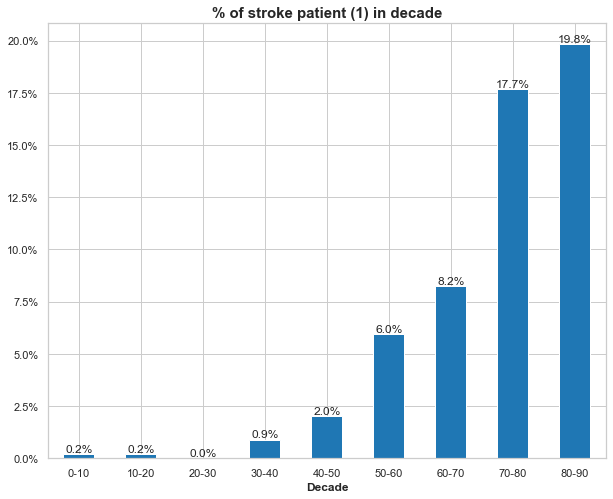

In [49]:
import matplotlib.ticker as mtick

plt.figure(figsize=[10,8])

(100*dt2[dt2["stroke"].isin([1])]['decade'].value_counts()/dt2['decade'].value_counts()).plot(kind='bar' , stacked=True , colormap='tab20' )
plt.title("% of stroke patient (1) in decade" , fontsize = 15, fontweight ='bold'  )
order1 = (100*dt2[dt2["stroke"].isin([1])]['decade'].value_counts()/dt2['decade'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.style.context('ggplot')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xlabel('Decade' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

>```  A recommendation for any paitent with age more than 40 to check up with a doctor frequently every 6 months. ``` 

#### Work_type

In [50]:
dt['work_type'].value_counts()

Private          2921
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [51]:
dt1['work_type'].value_counts()

Private          149
Self-employed     65
Govt_job          33
children           2
Name: work_type, dtype: int64

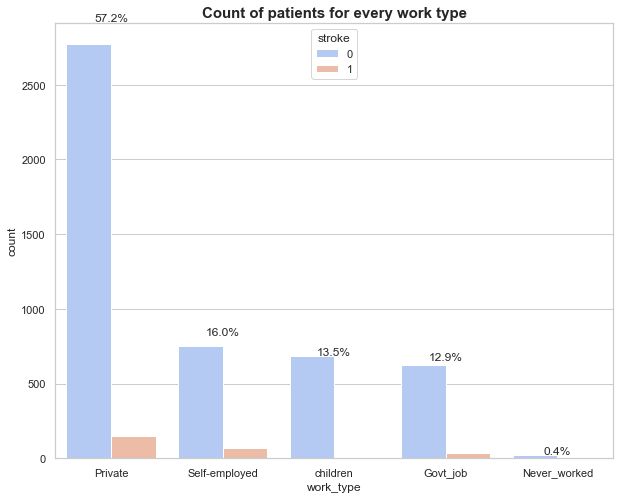

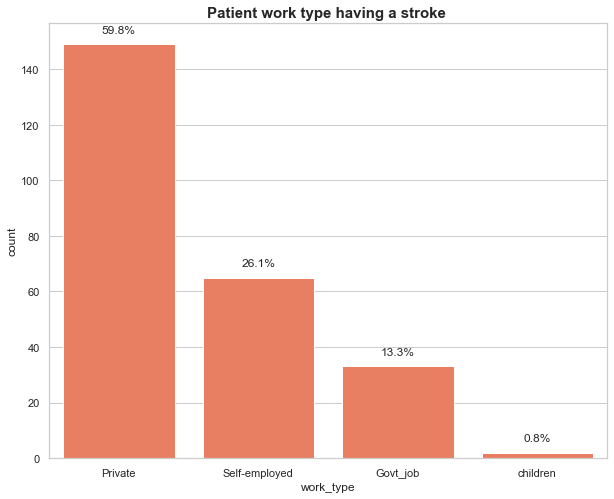

In [52]:
plt.figure(figsize=[10,8])
sns.countplot(data=dt,x=dt['work_type'] ,hue='stroke', palette='coolwarm' , order = dt['work_type'].value_counts().index )
order1 = dt['work_type'].value_counts()
for i in range(order1.shape[0]):
    count = order1[i]
    strt='{:0.1f}%'.format(100*count / dt.shape[0])
    plt.text(i,count+2,strt,ha='center') 
plt.title('Count of patients for every work type' , fontsize = 15, fontweight ='bold')
plt.show()

plt.figure(figsize=[10,8])
sns.countplot(data=dt1,x=dt1['work_type'], color='xkcd:pinkish orange' )
order2 = dt1['work_type'].value_counts()
for i in range(order2.shape[0]):
    count = order2[i]
    strt='{:0.1f}%'.format(100*count / dt1.shape[0])
    plt.text(i,count+4,strt,ha='center') 
plt.title('Patient work type having a stroke ' , fontsize = 15, fontweight ='bold')
plt.show()

posx and posy should be finite values
posx and posy should be finite values


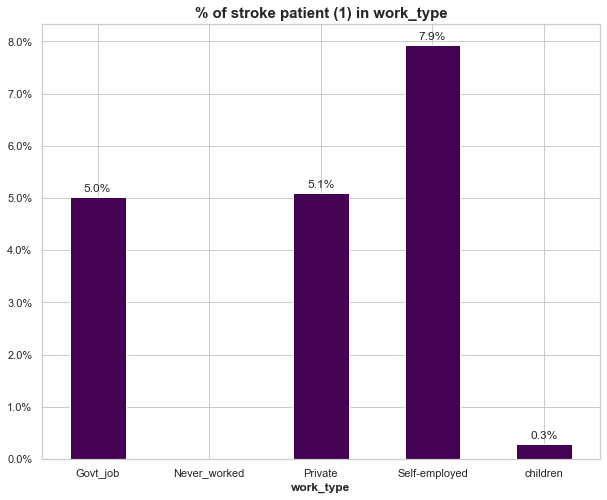

In [53]:
import matplotlib.ticker as mtick

plt.figure(figsize=[10,8])

(100*dt1['work_type'].value_counts()/dt['work_type'].value_counts()).plot(kind='bar' , stacked=True , colormap='viridis' )
plt.title("% of stroke patient (1) in work_type" , fontsize = 15, fontweight ='bold'  )
order1 = (100*dt1['work_type'].value_counts()/dt['work_type'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.style.context('ggplot')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xlabel('work_type' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

>``` Self employment job have the most effect on people to get a stroke. ```

#### ever_married

In [54]:
dt['ever_married'].value_counts()

Yes    3351
No     1755
Name: ever_married, dtype: int64

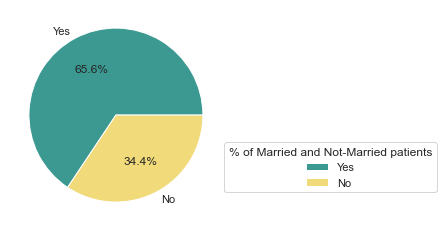

In [55]:
plt.pie(x=dt['ever_married'].value_counts(),labels=['Yes','No'],
    colors=['xkcd:sea','xkcd:sandy'] , pctdistance=0.6 , radius=1 , autopct='%1.1f%%' )
plt.legend(title = "% of Married and Not-Married patients" , loc=1 , bbox_to_anchor=(2, 0.4))
plt.show() 

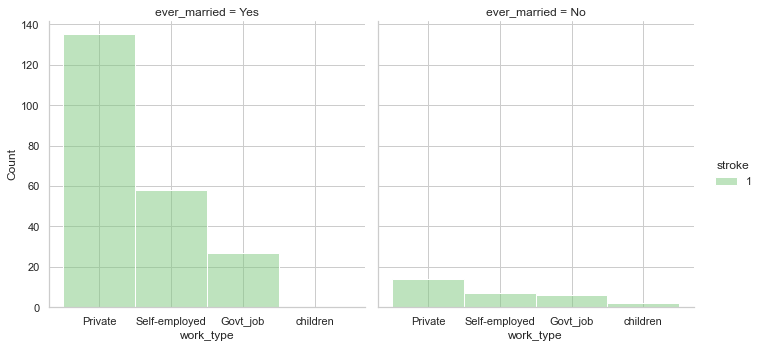

In [56]:
sns.set_theme(style="whitegrid")
sns.displot(dt[dt["stroke"].isin([1])],x='work_type',col='ever_married',hue='stroke',height=5,aspect=1,palette='Accent')
plt.show()

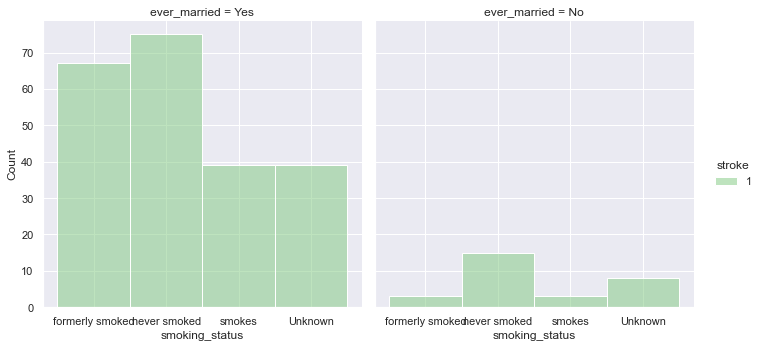

In [57]:
sns.set_theme(style="darkgrid")
sns.displot(dt[dt["stroke"].isin([1])],x='smoking_status',col='ever_married',hue='stroke',height=5,aspect=1,palette='Accent')
plt.show()

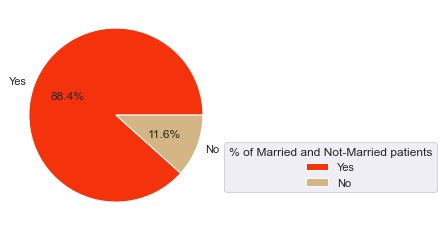

In [58]:
plt.pie(x=dt1['ever_married'].value_counts(),labels=['Yes','No'],
    colors=['xkcd:vermillion','xkcd:very light brown'] , pctdistance=0.6 , radius=1 , autopct='%1.1f%%' )
plt.legend(title = "% of Married and Not-Married patients" , loc=1 , bbox_to_anchor=(2, 0.4))
plt.show() 

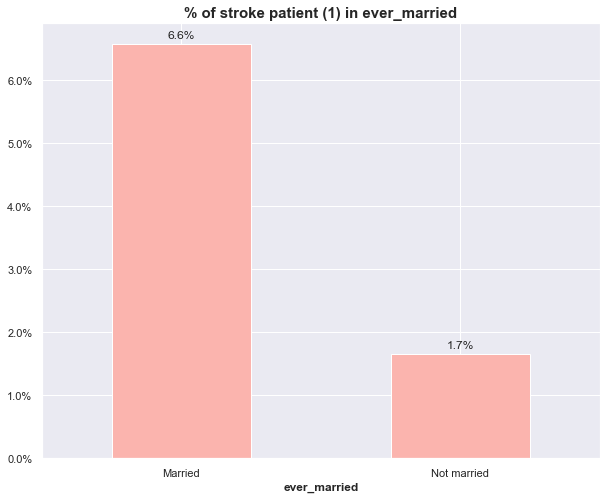

In [59]:
import matplotlib.ticker as mtick

plt.figure(figsize=[10,8])
x_labels=["Married","Not married"]
(100*dt1['ever_married'].value_counts()/dt['ever_married'].value_counts()).plot(kind='bar' , stacked=True , colormap='Pastel1' ).set_xticklabels(x_labels)
plt.title("% of stroke patient (1) in ever_married" , fontsize = 15, fontweight ='bold'  )
order1 = (100*dt1['ever_married'].value_counts()/dt['ever_married'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.style.context('ggplot')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xlabel('ever_married' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

>``` The most of people get a stroke are the married one. ```

#### Residence_type

In [60]:
dt['Residence_type'].value_counts()

Urban    2595
Rural    2511
Name: Residence_type, dtype: int64

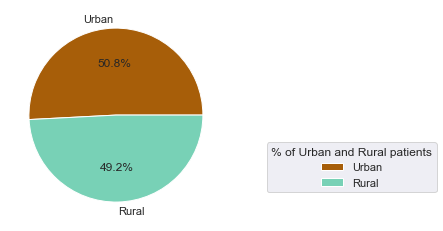

In [61]:
plt.pie(x=dt['Residence_type'].value_counts(),labels=['Urban','Rural'],
    colors=['xkcd:raw umber','xkcd:seafoam blue'] , pctdistance=0.6 , radius=1 , autopct='%1.1f%%' )
plt.legend(title = "% of Urban and Rural patients" , loc=1 , bbox_to_anchor=(2, 0.4))
plt.show() 

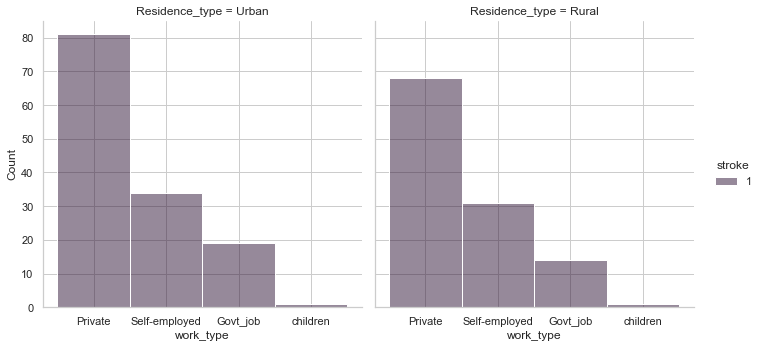

In [62]:
sns.set_theme(style="whitegrid")
sns.displot(dt[dt["stroke"].isin([1])],x='work_type',col='Residence_type',hue='stroke',height=5,aspect=1,palette='twilight')
plt.show()

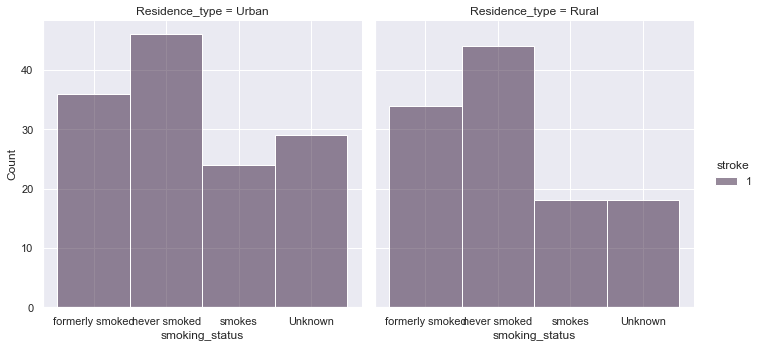

In [63]:
sns.set_theme(style="darkgrid")
sns.displot(dt[dt["stroke"].isin([1])],x='smoking_status',col='Residence_type',hue='stroke',
            height=5,aspect=1,palette='twilight')
plt.show()

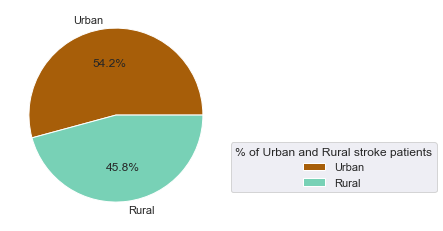

In [64]:
plt.pie(x=dt1['Residence_type'].value_counts(),labels=['Urban','Rural'],
    colors=['xkcd:raw umber','xkcd:seafoam blue'] , pctdistance=0.6 , radius=1 , autopct='%1.1f%%' )
plt.legend(title = "% of Urban and Rural stroke patients" , loc=1 , bbox_to_anchor=(2, 0.4))
plt.show()

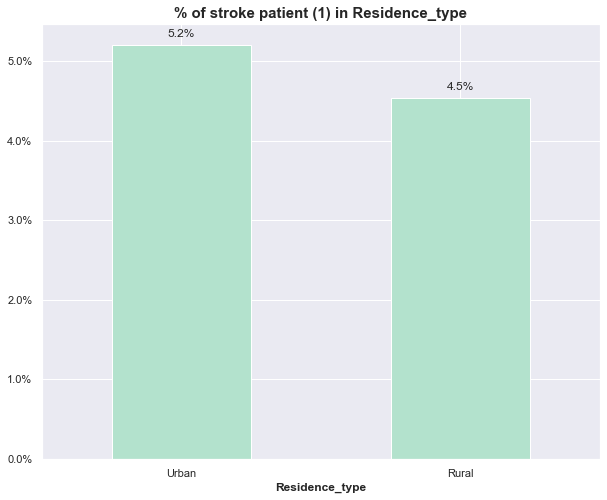

In [65]:
import matplotlib.ticker as mtick

plt.figure(figsize=[10,8])
x_labels=["Urban","Rural"]
(100*dt1['Residence_type'].value_counts()/dt['Residence_type'].value_counts()).plot(kind='bar' , stacked=True , colormap='Pastel2' ).set_xticklabels(x_labels)
plt.title("% of stroke patient (1) in Residence_type" , fontsize = 15, fontweight ='bold'  )
order1 = (100*dt1['Residence_type'].value_counts()/dt['Residence_type'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.style.context('ggplot')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xlabel('Residence_type' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

>``` The Residence type not affects the reasons to get stroke. ```

#### Hypertension

In [66]:
dt['hypertension'].value_counts()

0    4611
1     495
Name: hypertension, dtype: int64

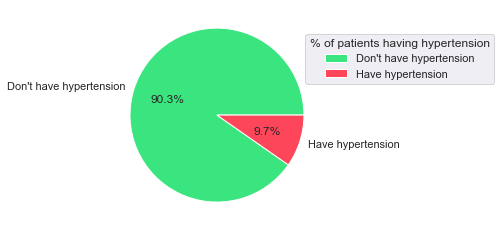

In [67]:
plt.pie(x=dt['hypertension'].value_counts(),labels=["Don't have hypertension",'Have hypertension'],
    colors=['xkcd:weird green','xkcd:watermelon'] , pctdistance=0.6 , radius=1 , autopct='%1.1f%%' )
plt.legend(title = "% of patients having hypertension" , loc=1 , bbox_to_anchor=(1.8, 0.9))
plt.show()

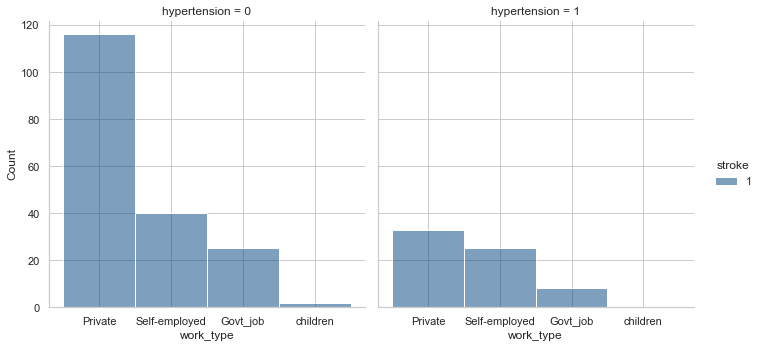

In [68]:
sns.set_theme(style="whitegrid")
sns.displot(dt[dt["stroke"].isin([1])],x='work_type',col='hypertension',hue='stroke',height=5,aspect=1,palette='ocean')
plt.show()

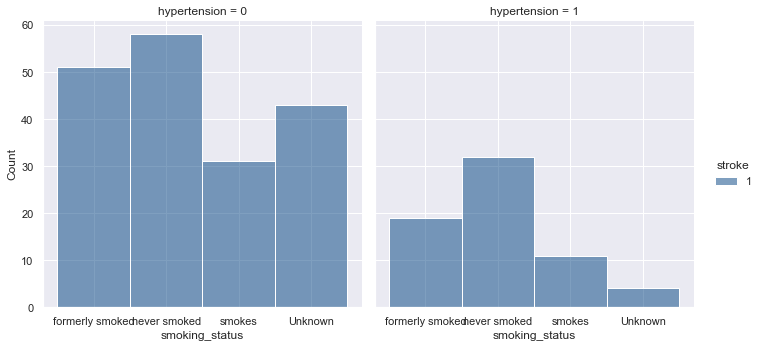

In [69]:
sns.set_theme(style="darkgrid")
sns.displot(dt[dt["stroke"].isin([1])],x='smoking_status',col='hypertension',hue='stroke',height=5,aspect=1,palette='ocean')
plt.show()

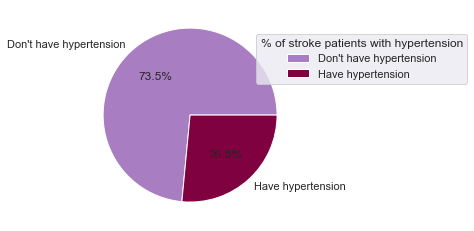

In [70]:
plt.pie(x=dt1['hypertension'].value_counts(),labels=["Don't have hypertension",'Have hypertension'],
    colors=['xkcd:wisteria','xkcd:wine'] , pctdistance=0.6 , radius=1 , autopct='%1.1f%%' )
plt.legend(title = "% of stroke patients with hypertension" , loc=1 , bbox_to_anchor=(1.8, 0.9))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

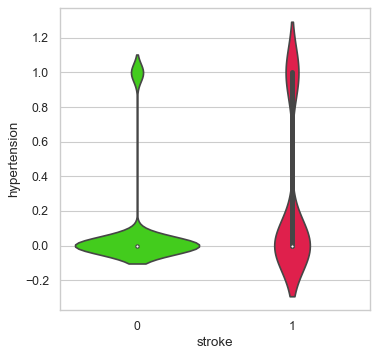

In [71]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(5,5), dpi=80)
sns.violinplot(data=dt,y=dt['hypertension'],x=dt['stroke'],palette='prism')
plt.show

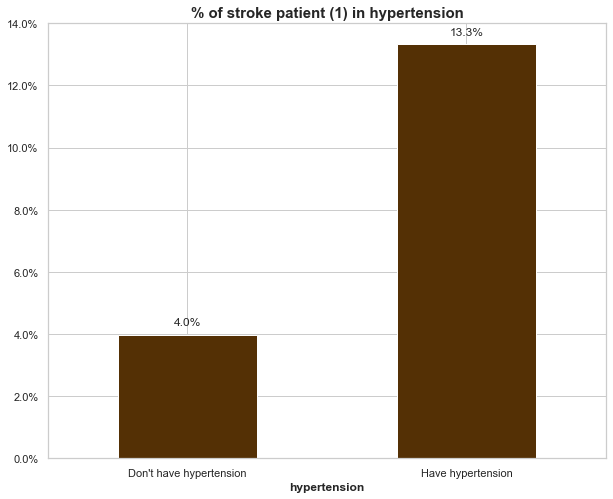

In [72]:
import matplotlib.ticker as mtick

plt.figure(figsize=[10,8])
x_labels=["Don't have hypertension","Have hypertension"]
(100*dt1['hypertension'].value_counts()/dt['hypertension'].value_counts()).plot(kind='bar' , stacked=True , colormap='BrBG' ).set_xticklabels(x_labels)
plt.title("% of stroke patient (1) in hypertension" , fontsize = 15, fontweight ='bold'  )
order1 = (100*dt1['hypertension'].value_counts()/dt['hypertension'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.3,strt,ha='center')

plt.style.context('ggplot')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xlabel('hypertension' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

>``` Hypertension patients have more probability to get a stroke. ```

#### Heart Disease

In [73]:
dt['heart_disease'].value_counts()

0    4830
1     276
Name: heart_disease, dtype: int64

In [74]:
dt1['heart_disease'].value_counts()

0    202
1     47
Name: heart_disease, dtype: int64

In [75]:
100*dt1['heart_disease'].value_counts()/dt['heart_disease'].value_counts()

0     4.182195
1    17.028986
Name: heart_disease, dtype: float64

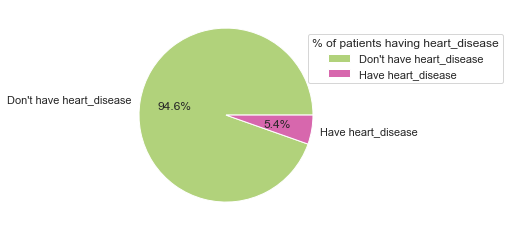

In [76]:
plt.pie(x=dt['heart_disease'].value_counts(),labels=["Don't have heart_disease",'Have heart_disease'],
    colors=['xkcd:pale olive green','xkcd:pale magenta'] , pctdistance=0.6 , radius=1 , autopct='%1.1f%%' )
plt.legend(title = "% of patients having heart_disease" , loc=1 , bbox_to_anchor=(1.8, 0.9))
plt.show()

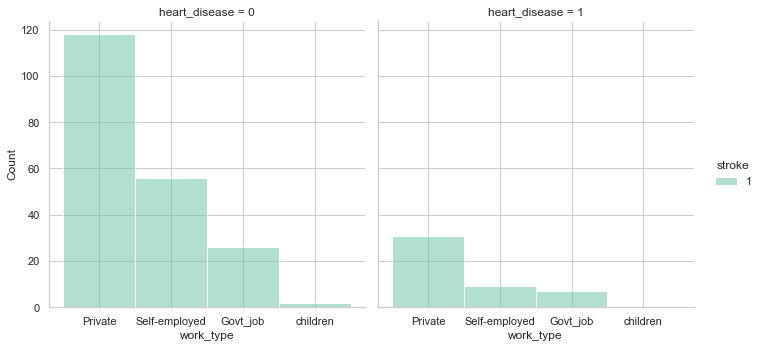

In [77]:
sns.set_theme(style="whitegrid")
sns.displot(dt[dt["stroke"].isin([1])],x='work_type',col='heart_disease',hue='stroke',height=5,aspect=1,palette='BuGn')
plt.show()

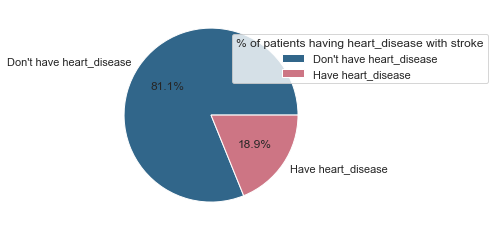

In [78]:
plt.pie(x=dt1['heart_disease'].value_counts(),labels=["Don't have heart_disease",'Have heart_disease'],
    colors=['xkcd:ugly blue','xkcd:ugly pink'] , pctdistance=0.6 , radius=1 , autopct='%1.1f%%' )
plt.legend(title = "% of patients having heart_disease with stroke" , loc=1 , bbox_to_anchor=(1.8, 0.9))
plt.show()

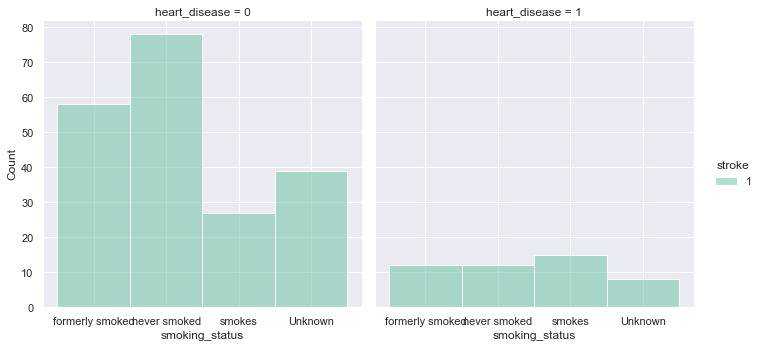

In [79]:
sns.set_theme(style="darkgrid")
sns.displot(dt[dt["stroke"].isin([1])],x='smoking_status',col='heart_disease',hue='stroke',height=5,aspect=1,palette='BuGn')
plt.show()

>``` Patient with heart disease have to quit smoking as they are most likely to have a stroke. ```

<function matplotlib.pyplot.show(close=None, block=None)>

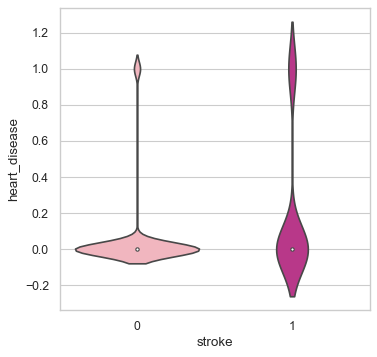

In [80]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(5,5), dpi=80)
sns.violinplot(data=dt,y=dt['heart_disease'],x=dt['stroke'],palette='RdPu')
plt.show

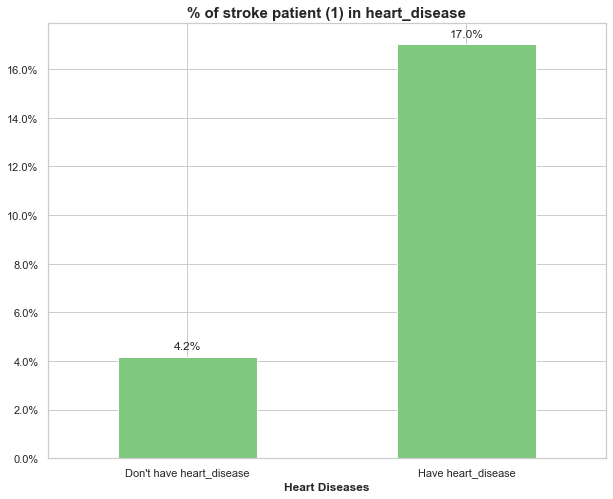

In [81]:
import matplotlib.ticker as mtick

plt.figure(figsize=[10,8])
x_labels=["Don't have heart_disease","Have heart_disease"]
(100*dt1['heart_disease'].value_counts()/dt['heart_disease'].value_counts()).plot(kind='bar' , stacked=True , colormap='Accent' ).set_xticklabels(x_labels)
plt.title("% of stroke patient (1) in heart_disease" , fontsize = 15, fontweight ='bold'  )
order1 = (100*dt1['heart_disease'].value_counts()/dt['heart_disease'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.3,strt,ha='center')

plt.style.context('ggplot')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xlabel('Heart Diseases' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

#### Combination of hypertension & heart_disease

In [82]:
plt.figure(figsize=(15, 8), dpi=80)
check_disease=dt.groupby(["hypertension", "heart_disease"])
check_disease['stroke'].count()

hypertension  heart_disease
0             0                4399
              1                 212
1             0                 431
              1                  64
Name: stroke, dtype: int64

<Figure size 1200x640 with 0 Axes>

In [83]:
plt.figure(figsize=(15, 8), dpi=80)
check_disease1=dt[dt["stroke"].isin([1])].groupby(["hypertension", "heart_disease"])
check_disease1['stroke'].count()

hypertension  heart_disease
0             0                149
              1                 34
1             0                 53
              1                 13
Name: stroke, dtype: int64

<Figure size 1200x640 with 0 Axes>

In [84]:
100*check_disease1['stroke'].size()/check_disease['stroke'].size()

hypertension  heart_disease
0             0                 3.387133
              1                16.037736
1             0                12.296984
              1                20.312500
Name: stroke, dtype: float64

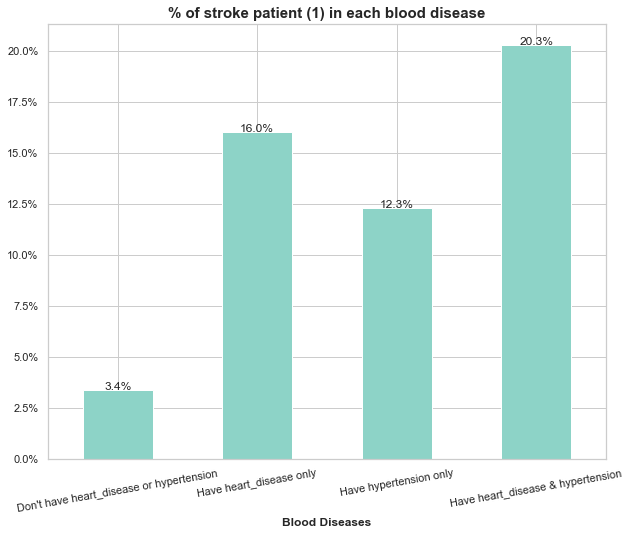

In [85]:
import matplotlib.ticker as mtick

plt.figure(figsize=[10,8])
x_labels=["Don't have heart_disease or hypertension","Have heart_disease only",
                                             "Have hypertension only","Have heart_disease & hypertension"]
(100*check_disease1['stroke'].size()/check_disease['stroke'].size()).plot(kind='bar' , stacked=True , colormap='Set3' ).set_xticklabels(x_labels)
plt.title("% of stroke patient (1) in each blood disease" , fontsize = 15, fontweight ='bold'  )
order1 = (100*check_disease1['stroke'].size()/check_disease['stroke'].size())
for n in range(2):
    count = order1[0][n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count,strt,ha='center')
for n in range(2):
    count = order1[1][n]
    strt='{:0.1f}%'.format(count)
    plt.text(n+2,count,strt,ha='center')
plt.style.context('ggplot')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xlabel('Blood Diseases' , fontweight ='bold')
plt.xticks(rotation=10)
plt.show()

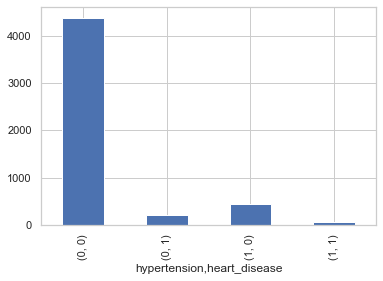

In [86]:
check_disease=dt.groupby(["hypertension", "heart_disease"])
check_disease['stroke'].count().plot(kind='bar')
plt.show()

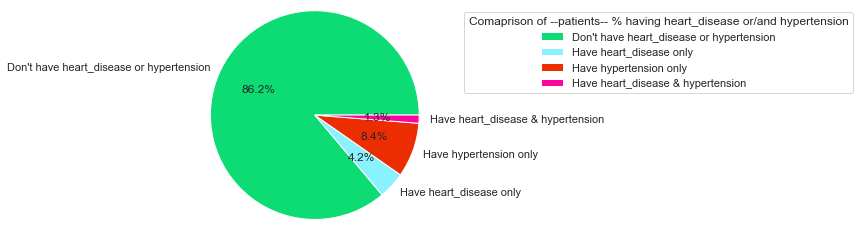

In [87]:
check_disease['stroke'].count().plot(kind='pie' , colors=['xkcd:tealish green','xkcd:robin egg blue' , 
                                                          'xkcd:tomato red' , 'xkcd:shocking pink'] ,
                                     labels=["Don't have heart_disease or hypertension","Have heart_disease only",
                                             "Have hypertension only","Have heart_disease & hypertension"], 
                                     pctdistance=0.6 , radius=1.2 , autopct='%1.1f%%')
plt.legend(title = "Comaprison of --patients-- % having heart_disease or/and hypertension" , loc=1 , bbox_to_anchor=(3, 1))
plt.ylabel('')
plt.show()

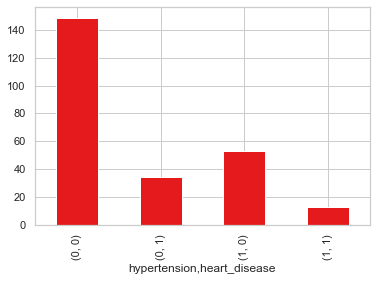

In [88]:
check_disease1=dt[dt["stroke"].isin([1])].groupby(["hypertension", "heart_disease"])
check_disease1['stroke'].count().plot(kind='bar' , stacked=True , colormap='Set1')
plt.show()

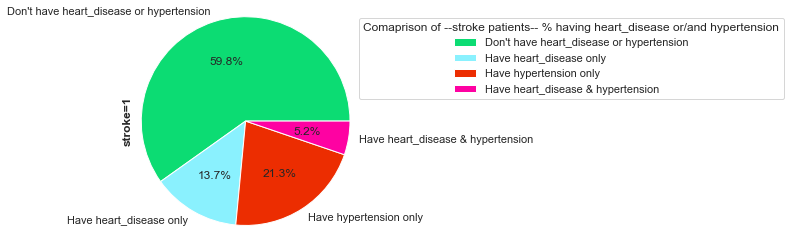

In [89]:
check_disease1['stroke'].count().plot(kind='pie' , 
                                      colors=['xkcd:tealish green','xkcd:robin egg blue' , 
                                              'xkcd:tomato red' , 'xkcd:shocking pink'] ,
                                      labels=["Don't have heart_disease or hypertension","Have heart_disease only",
                                              "Have hypertension only","Have heart_disease & hypertension"],
                                      pctdistance=0.6 , radius=1.2 , autopct='%1.1f%%')
plt.legend(title ="Comaprison of --stroke patients-- % having heart_disease or/and hypertension", loc=1 , bbox_to_anchor=(3, 1))
plt.ylabel('stroke=1', fontweight ='bold' )
plt.show()

>``` People who has hypertension and heart diseases are the most to get stroke. ``` 

#### Compare of different diseases ( heart disease or hypertension ) with surger patients

In [90]:
plt.figure(figsize=(15, 8), dpi=80)
check_disease3=dt[dt.avg_glucose_level >= 150].groupby(["hypertension", "heart_disease"])
check_disease3['stroke'].count()

hypertension  heart_disease
0             0                483
              1                 72
1             0                143
              1                 32
Name: stroke, dtype: int64

<Figure size 1200x640 with 0 Axes>

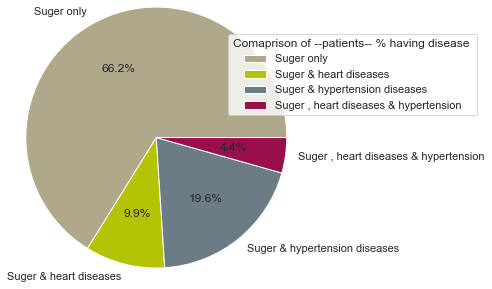

In [91]:
check_disease3['stroke'].count().plot(kind='pie' , 
                                      colors=['xkcd:bland','xkcd:bile' , 
                                                           'xkcd:battleship grey' , 'xkcd:berry'] ,
                                     labels=["Suger only","Suger & heart diseases","Suger & hypertension diseases",
                                             "Suger , heart diseases & hypertension"], 
                                     pctdistance=0.6 , radius=1.5 , autopct='%1.1f%%')
plt.legend(title = "Comaprison of --patients-- % having disease " , loc=1 , bbox_to_anchor=(2, 1))
plt.show()

In [92]:
plt.figure(figsize=(15, 8), dpi=80)
check_disease4=dt1[dt.avg_glucose_level >= 150].groupby(["hypertension", "heart_disease"])
check_disease4['stroke'].count()

<ipython-input-92-19a110e03e1d>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  check_disease4=dt1[dt.avg_glucose_level >= 150].groupby(["hypertension", "heart_disease"])


hypertension  heart_disease
0             0                42
              1                18
1             0                22
              1                 8
Name: stroke, dtype: int64

<Figure size 1200x640 with 0 Axes>

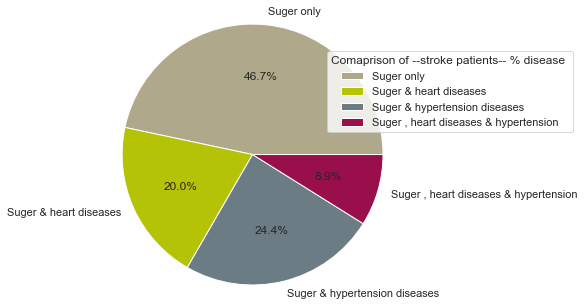

In [93]:
check_disease4['stroke'].count().plot(kind='pie' , 
                                      colors=['xkcd:bland','xkcd:bile' , 
                                                           'xkcd:battleship grey' , 'xkcd:berry'] ,
                                     labels=["Suger only","Suger & heart diseases","Suger & hypertension diseases",
                                             "Suger , heart diseases & hypertension"], 
                                     pctdistance=0.6 , radius=1.5 , autopct='%1.1f%%')
plt.legend(title = "Comaprison of --stroke patients-- % disease " , loc=1 , bbox_to_anchor=(2, 1))
plt.show()

In [94]:
(100*check_disease4['stroke'].count()/check_disease3['stroke'].count())

hypertension  heart_disease
0             0                 8.695652
              1                25.000000
1             0                15.384615
              1                25.000000
Name: stroke, dtype: float64

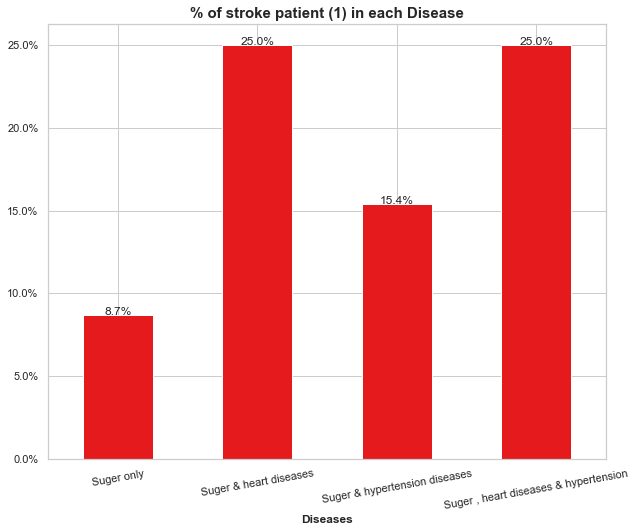

In [95]:
import matplotlib.ticker as mtick

plt.figure(figsize=[10,8])
x_labels=["Suger only","Suger & heart diseases","Suger & hypertension diseases",
                                             "Suger , heart diseases & hypertension"]
(100*check_disease4['stroke'].count()/check_disease3['stroke'].count()).plot(kind='bar' , stacked=True , colormap='Set1' ).set_xticklabels(x_labels)
plt.title("% of stroke patient (1) in each Disease" , fontsize = 15, fontweight ='bold'  )
order1 = (100*check_disease4['stroke'].count()/check_disease3['stroke'].count())
for n in range(2):
    count = order1[0][n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count,strt,ha='center')
for n in range(2):
    count = order1[1][n]
    strt='{:0.1f}%'.format(count)
    plt.text(n+2,count,strt,ha='center')
plt.style.context('ggplot')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xlabel('Diseases' , fontweight ='bold')
plt.xticks(rotation=10)
plt.show()

>``` More than half of patient with suger disease who have stroke are also have another disease ( heart disease or hypertension disease ).  ```

#### Smoking_status

In [96]:
dt['smoking_status'].value_counts().sort_index(key=lambda x: x.str.lower())

formerly smoked     885
never smoked       1890
smokes              788
Unknown            1543
Name: smoking_status, dtype: int64

In [97]:
dt1['smoking_status'].value_counts().sort_index(key=lambda x: x.str.lower())

formerly smoked    70
never smoked       90
smokes             42
Unknown            47
Name: smoking_status, dtype: int64

In [98]:
(100*dt1['smoking_status'].value_counts().sort_index(key=lambda x: x.str.lower())/dt['smoking_status'].value_counts().sort_index(key=lambda x: x.str.lower()))

formerly smoked    7.909605
never smoked       4.761905
smokes             5.329949
Unknown            3.046014
Name: smoking_status, dtype: float64

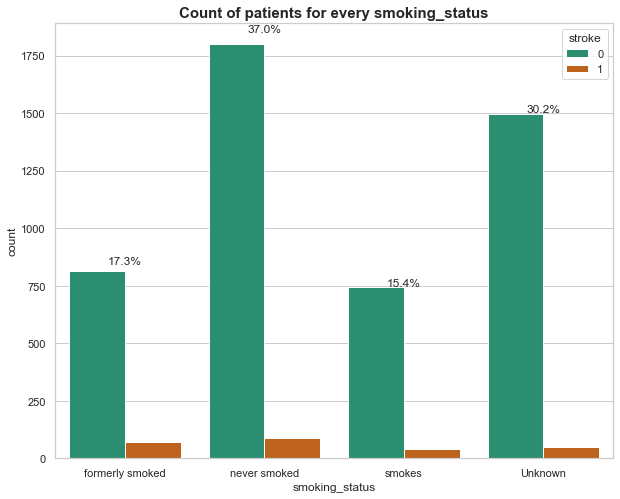

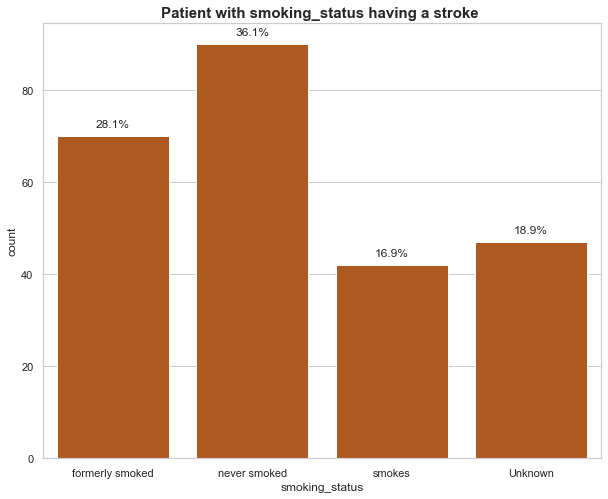

In [99]:
plt.figure(figsize=[10,8])
sns.countplot(data=dt,x=dt['smoking_status'],hue='stroke', palette='Dark2' )
plt.title('Count of patients for every smoking_status' , fontsize = 15, fontweight ='bold')
order1 = dt['smoking_status'].value_counts().sort_index(key=lambda x: x.str.lower())
for i in range(order1.shape[0]):
    count = order1[i]
    strt='{:0.1f}%'.format(100*count / dt.shape[0])
    plt.text(i,count-40,strt,ha='center')
plt.show()

plt.figure(figsize=[10,8])
sns.countplot(data=dt[dt["stroke"].isin([1])],x=dt1['smoking_status'], color='xkcd:rust orange' )
plt.title('Patient with smoking_status having a stroke ' , fontsize = 15, fontweight ='bold')
order2 = dt1['smoking_status'].value_counts().sort_index(key=lambda x: x.str.lower())
for i in range(order2.shape[0]):
    count = order2[i]
    strt='{:0.1f}%'.format(100*count / dt1.shape[0])
    plt.text(i,count+2,strt,ha='center')  
plt.show()

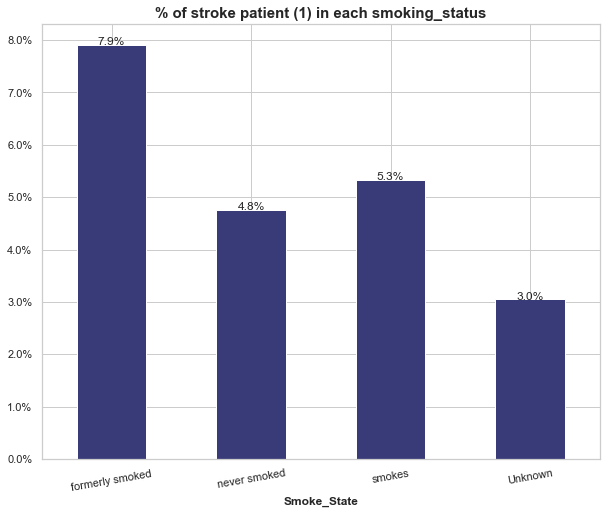

In [100]:
import matplotlib.ticker as mtick
plt.figure(figsize=[10,8])
(100*dt1['smoking_status'].value_counts().sort_index(key=lambda x: x.str.lower())/dt['smoking_status'].value_counts().sort_index(key=lambda x: x.str.lower())).plot(kind='bar' , stacked=True , colormap='tab20b' )
plt.title("% of stroke patient (1) in each smoking_status" , fontsize = 15, fontweight ='bold'  )
order1 = (100*dt1['smoking_status'].value_counts().sort_index(key=lambda x: x.str.lower())/dt['smoking_status'].value_counts().sort_index(key=lambda x: x.str.lower()))
for i in range(order1.shape[0]):
    count = order1[i]
    strt='{:0.1f}%'.format(count)
    plt.text(i,count,strt,ha='center')
plt.style.context('ggplot')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter()) 
plt.xlabel('Smoke_State' , fontweight ='bold')
plt.xticks(rotation=10)
plt.show()

>``` The smoking people who have quite smoking or still smoking are more probably to get stroke than who don't never smoked.``` 

----

## Preprocessing

Corrolation between parameters

<AxesSubplot:>

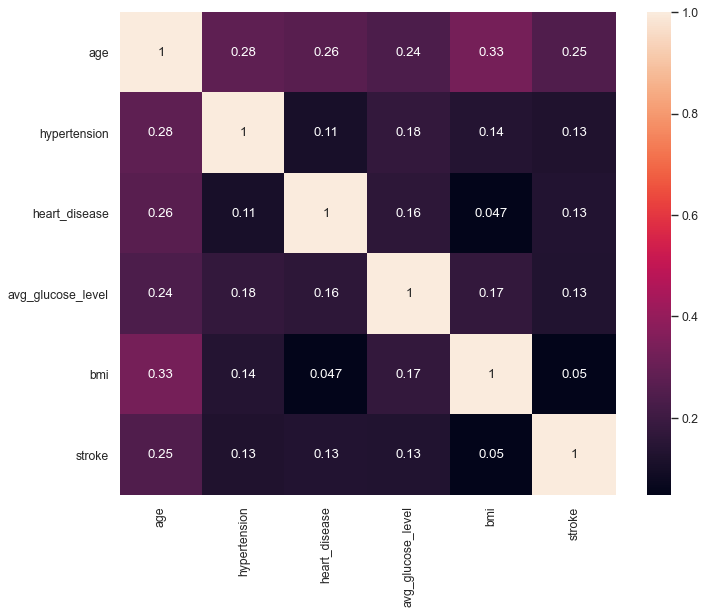

In [101]:
plt.figure(figsize=(10, 8), dpi=80)
sns.heatmap(data=dt.drop(['id'], axis=1).corr(),cmap='rocket',cbar=True,robust=False,annot=True)

---

### Label Encoder :

In [102]:
dt.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [103]:
dt_clean=dt.drop(['id', 'gender'], axis=1)

In [104]:
from sklearn.preprocessing import LabelEncoder
ever_married_le   =LabelEncoder()
work_type_le      =LabelEncoder()
Residence_type_le =LabelEncoder()
smoking_status_Le =LabelEncoder()
dt_clean['ever_married']   =ever_married_le.fit_transform(dt_clean['ever_married'])
dt_clean['work_type']      =work_type_le.fit_transform(dt_clean['work_type'] )
dt_clean['Residence_type'] =Residence_type_le.fit_transform(dt_clean['Residence_type'])
dt_clean['smoking_status'] =smoking_status_Le.fit_transform(dt_clean['smoking_status'])

In [105]:
dt_clean.head()

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,67.0,0,1,1,2,1,228.69,36.60,1,1
1,61.0,0,0,1,3,0,202.21,34.55,2,1
2,80.0,0,1,1,2,0,105.92,32.50,2,1
3,49.0,0,0,1,2,1,171.23,34.40,3,1
4,79.0,1,0,1,3,0,174.12,24.00,2,1


In [106]:
dt_clean.drop('stroke',axis=1,inplace=True)

---

### Standardization of model parameters :

In [107]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
dt_prep=pd.DataFrame(std.fit_transform(dt_clean),columns=dt_clean.columns)

In [108]:
x=dt_prep
y=dt.iloc[:,-1]

In [109]:
dt_prep.head()

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.050791,-0.327646,4.183300,0.723688,-0.153898,0.983682,2.707351,1.013643,-0.351529
1,0.785474,-0.327646,-0.239046,0.723688,0.763025,-1.016589,2.122299,0.744356,0.581861
2,1.625646,-0.327646,4.183300,0.723688,-0.153898,-1.016589,-0.005141,0.475069,0.581861
3,0.254839,-0.327646,-0.239046,0.723688,-0.153898,0.983682,1.437824,0.724652,1.515251
4,1.581426,3.052073,-0.239046,0.723688,0.763025,-1.016589,1.501676,-0.641488,0.581861


In [110]:
x

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.050791,-0.327646,4.183300,0.723688,-0.153898,0.983682,2.707351,1.013643,-0.351529
1,0.785474,-0.327646,-0.239046,0.723688,0.763025,-1.016589,2.122299,0.744356,0.581861
2,1.625646,-0.327646,4.183300,0.723688,-0.153898,-1.016589,-0.005141,0.475069,0.581861
3,0.254839,-0.327646,-0.239046,0.723688,-0.153898,0.983682,1.437824,0.724652,1.515251
4,1.581426,3.052073,-0.239046,0.723688,0.763025,-1.016589,1.501676,-0.641488,0.581861
...,...,...,...,...,...,...,...,...,...
5101,1.625646,3.052073,-0.239046,0.723688,-0.153898,0.983682,-0.494967,0.054718,0.581861
5102,1.669865,-0.327646,-0.239046,0.723688,0.763025,0.983682,0.420833,1.460266,0.581861
5103,-0.364236,-0.327646,-0.239046,0.723688,0.763025,-1.016589,-0.511758,0.225485,0.581861
5104,0.343278,-0.327646,-0.239046,0.723688,-0.153898,-1.016589,1.328679,-0.431313,-0.351529


In [111]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5106, dtype: int64

In [112]:
check_dt=pd.concat([x,y], axis=1)

check_dt.head()

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.050791,-0.327646,4.183300,0.723688,-0.153898,0.983682,2.707351,1.013643,-0.351529,1.0
1,0.785474,-0.327646,-0.239046,0.723688,0.763025,-1.016589,2.122299,0.744356,0.581861,1.0
2,1.625646,-0.327646,4.183300,0.723688,-0.153898,-1.016589,-0.005141,0.475069,0.581861,1.0
3,0.254839,-0.327646,-0.239046,0.723688,-0.153898,0.983682,1.437824,0.724652,1.515251,1.0
4,1.581426,3.052073,-0.239046,0.723688,0.763025,-1.016589,1.501676,-0.641488,0.581861,1.0


---

### Imbalanced Class weights for prediction :

In [113]:
from sklearn.utils.class_weight import compute_class_weight

In [114]:
class_weights = compute_class_weight('balanced', np.unique(y), y)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[0 1], y=0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5106, dtype: int64 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [115]:
class_weights[0]

0.525633106856084

In [116]:
class_weights[1]

10.25301204819277

In [117]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(sampling_strategy='minority')
X_os, y_os = oversample.fit_resample(x,y)

In [118]:
x=X_os
y=y_os

In [119]:
x.shape

(9714, 9)

In [120]:
y.shape

(9714,)

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

----

---

# Machine Learning Models

In [122]:
ML_Model=[]
Train_score=[]
Test_score=[]
recall_0=[]
recall_1=[]

### KNN model :

In [123]:
from sklearn.neighbors import KNeighborsClassifier
Knn=KNeighborsClassifier(n_neighbors=3,p=1,metric='minkowski',weights='uniform').fit(X_train,y_train)
KNNsc_train=Knn.score(X_train,y_train)
KNNsc_test=Knn.score(X_test,y_test)

In [124]:
y_pred_knn=Knn.predict(X_test)

In [125]:
KNNsc_train

0.9558758640976615

In [126]:
KNNsc_test

0.9183533447684391

In [127]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
confusion_matrix(y_test,y_pred_knn)

array([[1245,  206],
       [  32, 1432]], dtype=int64)

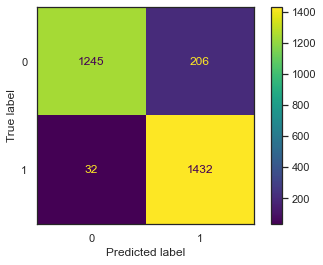

In [128]:
sns.set_theme(style="white")
plot_confusion_matrix(Knn, X_test, y_test)
plt.show()

In [129]:
print(classification_report(y_test,y_pred_knn,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      1451
           1       0.87      0.98      0.92      1464

    accuracy                           0.92      2915
   macro avg       0.92      0.92      0.92      2915
weighted avg       0.92      0.92      0.92      2915



In [130]:
from sklearn.metrics import recall_score
r_sc_KNN=recall_score(y_test, y_pred_knn, average=None)
r_sc_KNN

array([0.85802895, 0.97814208])

Text(0.5, 1.0, 'KNN model Precision-Recall curve: AP=0.87')

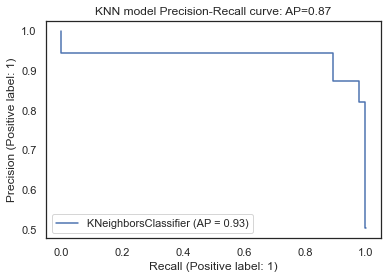

In [131]:
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
plot_precision_recall_curve(Knn, X_test, y_test).ax_.set_title(
    'KNN model Precision-Recall curve: ''AP={0:0.2f}'.format(average_precision_score(y_test,y_pred_knn)))

In [132]:
ML_Model.append('KNN')
Train_score.append(KNNsc_train)
Test_score.append(KNNsc_test)
recall_0.append(r_sc_KNN[0])
recall_1.append(r_sc_KNN[1])

----

### SVC model :

In [133]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
sv=SVC(C=1,kernel='rbf')
parameters = { 'C' : [0.1 , 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 , 100, 250 ,800 , 1000 ] }
grid_SVC = GridSearchCV( sv, parameters )  
mod_SVC = grid_SVC.fit( X_train, y_train )
SVCsc_train=mod_SVC.score(X_train,y_train)
SVCsc_test=mod_SVC.score(X_test,y_test)

In [134]:
y_pred_SVC=mod_SVC.predict(X_test)

In [135]:
SVCsc_train

0.9398440947198118

In [136]:
SVCsc_test

0.9183533447684391

In [137]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test,y_pred_SVC)

array([[1247,  204],
       [  34, 1430]], dtype=int64)

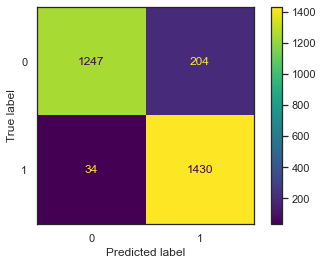

In [138]:
sns.set_theme(style="white")
plot_confusion_matrix(mod_SVC, X_test, y_test)
plt.show()

In [139]:
print(classification_report(y_test,y_pred_SVC,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      1451
           1       0.88      0.98      0.92      1464

    accuracy                           0.92      2915
   macro avg       0.92      0.92      0.92      2915
weighted avg       0.92      0.92      0.92      2915



In [140]:
from sklearn.metrics import recall_score
r_sc_SVC=recall_score(y_test, y_pred_SVC, average=None)
r_sc_SVC

array([0.85940731, 0.97677596])

Text(0.5, 1.0, 'SVC model Precision-Recall curve: AP=0.87')

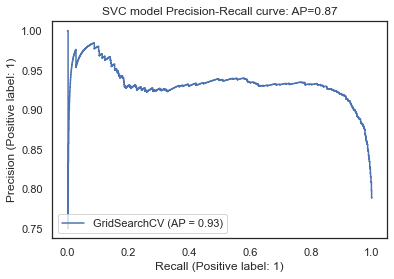

In [141]:
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
plot_precision_recall_curve(mod_SVC, X_test, y_test).ax_.set_title(
    'SVC model Precision-Recall curve: ''AP={0:0.2f}'.format(average_precision_score(y_test,y_pred_SVC)))

In [142]:
ML_Model.append('SVC')
Train_score.append(SVCsc_train)
Test_score.append(SVCsc_test)
recall_0.append(r_sc_SVC[0])
recall_1.append(r_sc_SVC[1])

---

### Naive Bayes :

In [143]:
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB()
mod_NB=NB.fit(X_train,y_train)
NB_sc_train=mod_NB.score(X_train,y_train)
NB_sc_test=mod_NB.score(X_test,y_test)

In [144]:
y_pred_NB=mod_NB.predict(X_test)

In [145]:
NB_sc_train

0.7737902632740109

In [146]:
NB_sc_test

0.7540308747855917

In [147]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
confusion_matrix(y_test,y_pred_NB)

array([[1053,  398],
       [ 319, 1145]], dtype=int64)

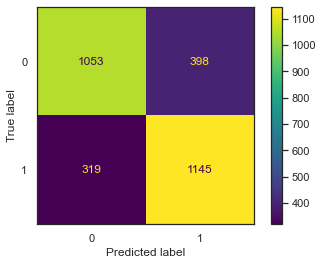

In [148]:
plot_confusion_matrix(mod_NB, X_test, y_test)
plt.show()  

In [149]:
print(classification_report(y_test,y_pred_NB,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75      1451
           1       0.74      0.78      0.76      1464

    accuracy                           0.75      2915
   macro avg       0.75      0.75      0.75      2915
weighted avg       0.75      0.75      0.75      2915



In [150]:
from sklearn.metrics import recall_score
r_sc_NB=recall_score(y_test, y_pred_NB, average=None)
r_sc_NB

array([0.72570641, 0.78210383])

In [151]:
ML_Model.append('Naive Bayes')
Train_score.append(NB_sc_train)
Test_score.append(NB_sc_test)
recall_0.append(r_sc_NB[0])
recall_1.append(r_sc_NB[1])

---

### Tree Classifier :

In [152]:
from sklearn.tree import DecisionTreeClassifier
Tree=DecisionTreeClassifier(max_depth=6,max_features=8)
mod_Tree=Tree.fit(X_train,y_train)
Tree_sc_train=mod_Tree.score(X_train,y_train)
Tree_sc_test=mod_Tree.score(X_test,y_test)

In [153]:
y_pred_Tree=mod_Tree.predict(X_test)

In [154]:
Tree_sc_train

0.839093984409472

In [155]:
Tree_sc_test

0.8164665523156089

In [156]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test,y_pred_Tree)

array([[1068,  383],
       [ 152, 1312]], dtype=int64)

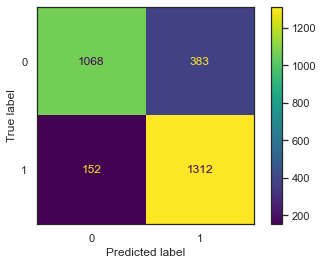

In [157]:
plot_confusion_matrix(mod_Tree, X_test, y_test)
plt.show()

In [158]:
print(classification_report(y_test,y_pred_Tree,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.88      0.74      0.80      1451
           1       0.77      0.90      0.83      1464

    accuracy                           0.82      2915
   macro avg       0.82      0.82      0.82      2915
weighted avg       0.82      0.82      0.82      2915



In [159]:
from sklearn.metrics import recall_score
r_sc_Tree=recall_score(y_test, y_pred_Tree, average=None)
r_sc_Tree

array([0.73604411, 0.89617486])

Text(0.0, 1.0, 'Percentage effect of each parameter on the Stroke happening')

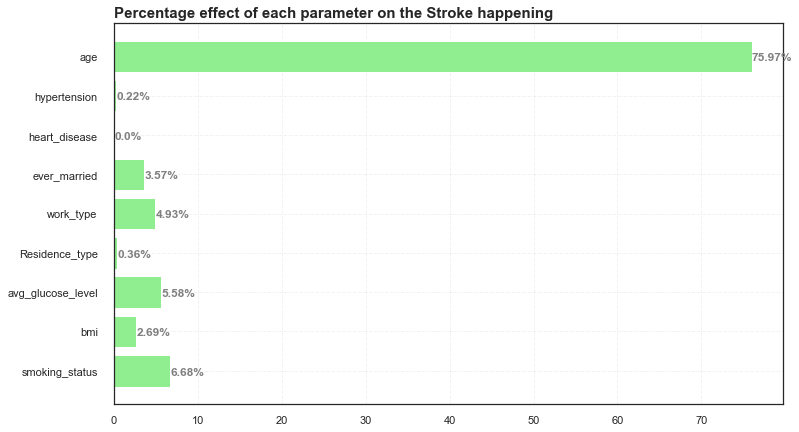

In [160]:
importance = (mod_Tree.feature_importances_)*100
 
fig, ax = plt.subplots(figsize =(12, 7))
ax.barh([x for x in range(len(importance))], importance , tick_label=x.columns , color='lightgreen'  )
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
ax.invert_yaxis()
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

for i in ax.patches:
    plt.text(i.get_width()+0.05, i.get_y()+0.5,
             str(round((i.get_width()), 2))+'%',
             fontsize = 12, fontweight ='bold',
             color ='grey')
ax.set_title('Percentage effect of each parameter on the Stroke happening',
             loc ='left', fontsize = 15, fontweight ='bold' )


In [161]:
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 75.97446
Feature: 1, Score: 0.22183
Feature: 2, Score: 0.00000
Feature: 3, Score: 3.56614
Feature: 4, Score: 4.92760
Feature: 5, Score: 0.36381
Feature: 6, Score: 5.57981
Feature: 7, Score: 2.68984
Feature: 8, Score: 6.67650


In [162]:
ML_Model.append('Tree Classifier')
Train_score.append(Tree_sc_train)
Test_score.append(Tree_sc_test)
recall_0.append(r_sc_Tree[0])
recall_1.append(r_sc_Tree[1])

___

### Random Forest Classifier :

In [163]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(max_depth=5,max_features=8)
mod_RF=RF.fit(X_train,y_train)
RF_sc_train=mod_RF.score(X_train,y_train)
RF_sc_test=mod_RF.score(X_test,y_test)

In [164]:
y_pred_RF=mod_RF.predict(X_test)

In [165]:
RF_sc_train

0.8445359611707604

In [166]:
RF_sc_test

0.8216123499142367

In [167]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
confusion_matrix(y_test,y_pred_RF)

array([[1117,  334],
       [ 186, 1278]], dtype=int64)

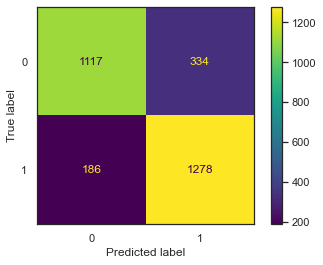

In [168]:
plot_confusion_matrix(mod_RF, X_test, y_test)
plt.show()

In [169]:
print(classification_report(y_test,y_pred_RF,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.86      0.77      0.81      1451
           1       0.79      0.87      0.83      1464

    accuracy                           0.82      2915
   macro avg       0.83      0.82      0.82      2915
weighted avg       0.82      0.82      0.82      2915



In [170]:
from sklearn.metrics import recall_score
r_sc_RF=recall_score(y_test, y_pred_RF, average=None)
r_sc_RF

array([0.76981392, 0.87295082])

Text(0.0, 1.0, 'Percentage effect of each parameter on the Stroke happening')

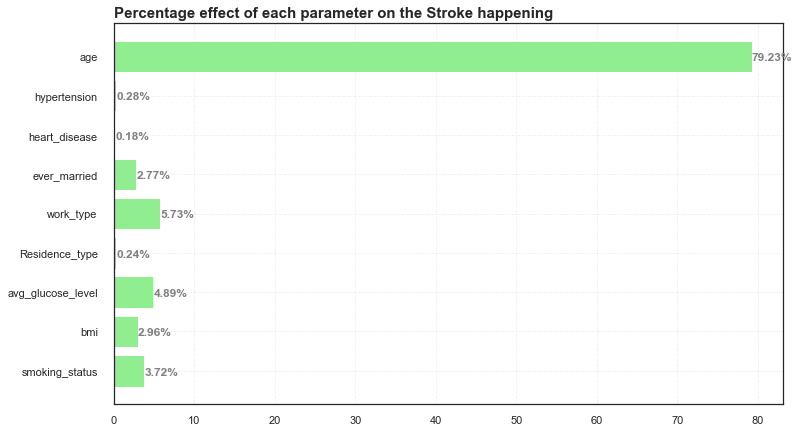

In [171]:
importance = (mod_RF.feature_importances_)*100
 
fig, ax = plt.subplots(figsize =(12, 7))
ax.barh([x for x in range(len(importance))], importance , tick_label=x.columns , color='lightgreen'  )
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
ax.invert_yaxis()
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

for i in ax.patches:
    plt.text(i.get_width()+0.05, i.get_y()+0.5,
             str(round((i.get_width()), 2))+'%',
             fontsize = 12, fontweight ='bold',
             color ='grey')
ax.set_title('Percentage effect of each parameter on the Stroke happening',
             loc ='left', fontsize = 15, fontweight ='bold' )


In [172]:
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 79.23446
Feature: 1, Score: 0.27992
Feature: 2, Score: 0.17969
Feature: 3, Score: 2.76969
Feature: 4, Score: 5.73193
Feature: 5, Score: 0.23638
Feature: 6, Score: 4.88619
Feature: 7, Score: 2.96370
Feature: 8, Score: 3.71804


In [173]:
ML_Model.append('Random Forest Classifier')
Train_score.append(RF_sc_train)
Test_score.append(RF_sc_test)
recall_0.append(r_sc_RF[0])
recall_1.append(r_sc_RF[1])

---

### XGB Classifier :

In [174]:
from xgboost import XGBClassifier
XGB=XGBClassifier(objective='binary:logistic',max_depth=7,learning_rate=0.3)
mod_XGB=XGB.fit(X_train,y_train)
XGB_sc_train=mod_XGB.score(X_train,y_train)
XGB_sc_test=mod_XGB.score(X_test,y_test)

C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:40:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [175]:
y_pred_XGB=mod_XGB.predict(X_test)

In [176]:
XGB_sc_train

0.9988233563759377

In [177]:
XGB_sc_test

0.9605488850771869

In [178]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
confusion_matrix(y_test,y_pred_XGB)

array([[1416,   35],
       [  80, 1384]], dtype=int64)

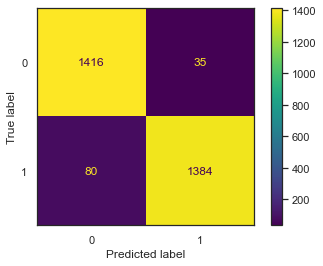

In [179]:
plot_confusion_matrix(mod_XGB, X_test, y_test)
plt.show()

In [180]:
print(classification_report(y_test,y_pred_XGB,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1451
           1       0.98      0.95      0.96      1464

    accuracy                           0.96      2915
   macro avg       0.96      0.96      0.96      2915
weighted avg       0.96      0.96      0.96      2915



In [181]:
from sklearn.metrics import recall_score
r_sc_XGB=recall_score(y_test, y_pred_XGB, average=None)
r_sc_XGB

array([0.9758787 , 0.94535519])

Text(0.5, 1.0, 'XGB model Precision-Recall curve: AP=0.95')

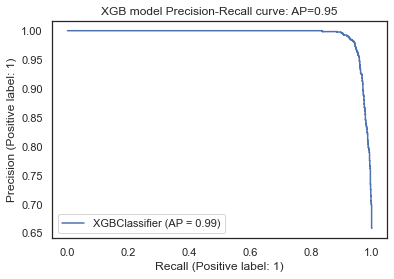

In [182]:
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
plot_precision_recall_curve(mod_XGB, X_test, y_test).ax_.set_title(
    'XGB model Precision-Recall curve: ''AP={0:0.2f}'.format(average_precision_score(y_test,y_pred_XGB)))

Text(0.0, 1.0, 'Percentage effect of each parameter on the Stroke happening')

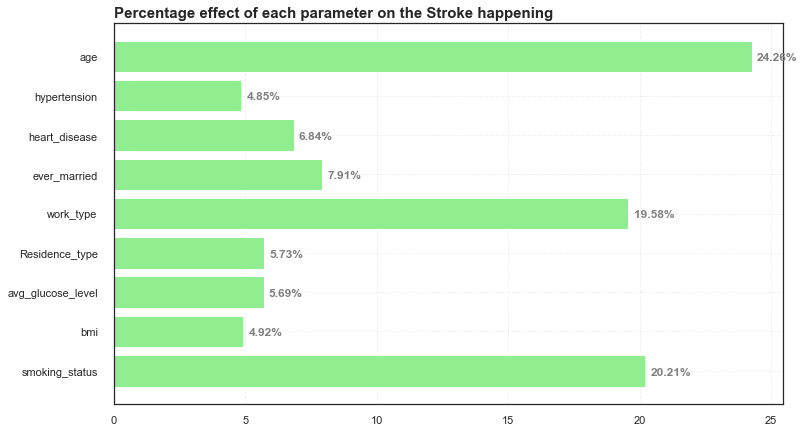

In [183]:
importance = (mod_XGB.feature_importances_)*100

fig, ax = plt.subplots(figsize =(12, 7))
ax.barh([x for x in range(len(importance))], importance , tick_label=x.columns , color='lightgreen'  )
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
ax.invert_yaxis()
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2))+'%',
             fontsize = 12, fontweight ='bold',
             color ='grey')
ax.set_title('Percentage effect of each parameter on the Stroke happening',
             loc ='left', fontsize = 15, fontweight ='bold' )


>``` Model is not dependent on only one parameter and have varity with stronge effect ("age"-"work_type"-"smoking_status" ) , moderite effect ("hypertension"-"heart_diseace"-"ever_married") and weak effect ("Residence_type"-"avg_glucose_level"-"bmi"). ```

In [184]:
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 24.25930
Feature: 1, Score: 4.85067
Feature: 2, Score: 6.84128
Feature: 3, Score: 7.91486
Feature: 4, Score: 19.57722
Feature: 5, Score: 5.72908
Feature: 6, Score: 5.69401
Feature: 7, Score: 4.92033
Feature: 8, Score: 20.21325


In [185]:
ML_Model.append('XGB Classifier')
Train_score.append(XGB_sc_train)
Test_score.append(XGB_sc_test)
recall_0.append(r_sc_XGB[0])
recall_1.append(r_sc_XGB[1])

----

### Logistic Regression :

In [186]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
parameters = { 'C' : [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 ] }
lg=LogisticRegression(penalty='l2')
grid_lg = GridSearchCV( lg, parameters )  
mod_lg = grid_lg.fit( X_train, y_train )
lg_sc_train=mod_lg.score(X_train,y_train)
lg_sc_test=mod_lg.score(X_test,y_test)

In [187]:
y_pred_lg=mod_lg.predict(X_test)

In [188]:
lg_sc_train

0.7918811589939697

In [189]:
lg_sc_test

0.7701543739279588

In [190]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
confusion_matrix(y_test,y_pred_lg)

array([[1068,  383],
       [ 287, 1177]], dtype=int64)

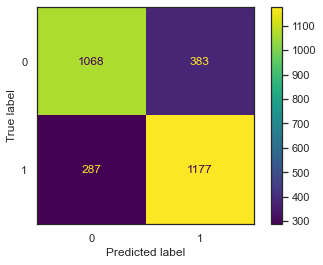

In [191]:
plot_confusion_matrix(mod_lg, X_test, y_test)
plt.show()

In [192]:
print(classification_report(y_test,y_pred_lg,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.79      0.74      0.76      1451
           1       0.75      0.80      0.78      1464

    accuracy                           0.77      2915
   macro avg       0.77      0.77      0.77      2915
weighted avg       0.77      0.77      0.77      2915



In [193]:
from sklearn.metrics import recall_score
r_sc_lg=recall_score(y_test, y_pred_lg, average=None)
r_sc_lg

array([0.73604411, 0.80396175])

In [194]:
ML_Model.append('Logistic Regression')
Train_score.append(lg_sc_train)
Test_score.append(lg_sc_test)
recall_0.append(r_sc_lg[0])
recall_1.append(r_sc_lg[1])

----

## Select The Best Models

In [195]:
Models={'ML_Model': ML_Model , 'Train_score': Train_score , 
        'Test_score' : Test_score , 'recall_0' : recall_0 , 'recall_1' : recall_1}

In [196]:
ML_Model_Comparison=pd.DataFrame( data=Models )

In [197]:
ML_Model_Comparison.sort_values('Train_score' ,inplace=True , ignore_index=True)

In [198]:
ML_Model_Comparison['Train_score']

0    0.773790
1    0.791881
2    0.839094
3    0.844536
4    0.939844
5    0.955876
6    0.998823
Name: Train_score, dtype: float64

In [199]:
ML_Model_Comparison

,ML_Model,Train_score,Test_score,recall_0,recall_1
0,Naive Bayes,0.773790,0.754031,0.725706,0.782104
1,Logistic Regression,0.791881,0.770154,0.736044,0.803962
2,Tree Classifier,0.839094,0.816467,0.736044,0.896175
3,Random Forest Classifier,0.844536,0.821612,0.769814,0.872951
4,SVC,0.939844,0.918353,0.859407,0.976776
5,KNN,0.955876,0.918353,0.858029,0.978142
6,XGB Classifier,0.998823,0.960549,0.975879,0.945355


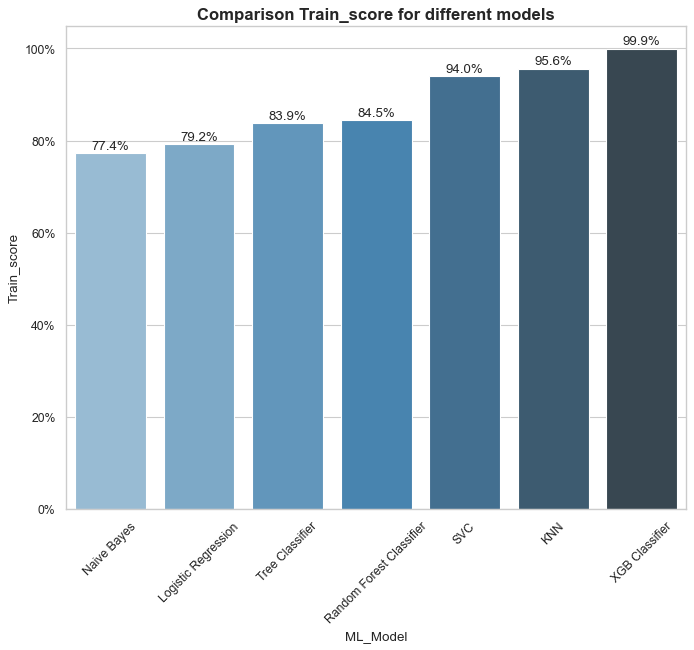

In [200]:
import matplotlib.ticker as mtick

plt.figure(figsize=(10, 8), dpi=80)
sns.set_theme(style="whitegrid")

sns.barplot(data=ML_Model_Comparison,x=ML_Model_Comparison['ML_Model'],y=ML_Model_Comparison['Train_score']*100 ,
            palette='Blues_d', color=sns.color_palette()[2] )

plt.title('Comparison Train_score for different models',
             fontsize = 15, fontweight ='bold')
order1 = ML_Model_Comparison['Train_score']
for i in range(order1.shape[0]):
    count = order1[i]
    strt='{:0.1f}%'.format(count * 100)
    plt.text(i,count*101,strt,ha='center')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.style.context('fivethirtyeight')
plt.xticks(rotation=45)
plt.show()

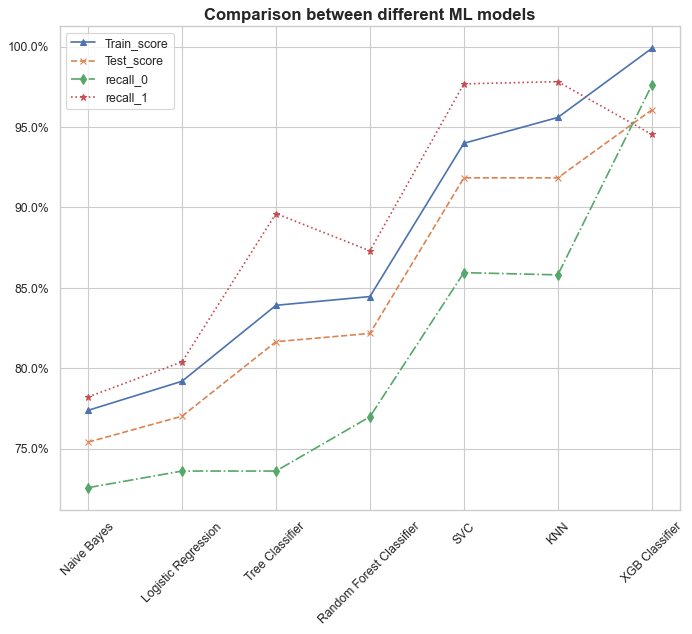

In [201]:
import matplotlib.ticker as mtick

plt.figure(figsize=(10, 8), dpi=80)
sns.set_theme(style="whitegrid")
plt.plot( ML_Model_Comparison['ML_Model'] , ML_Model_Comparison['Train_score']*100 , 
         label='Train_score' , linestyle="-"  , marker="^")
plt.plot( ML_Model_Comparison['ML_Model'] , ML_Model_Comparison['Test_score']*100  , 
         label='Test_score'  , linestyle="--" , marker="x")
plt.plot( ML_Model_Comparison['ML_Model'] , ML_Model_Comparison['recall_0']*100    , 
         label='recall_0'    , linestyle="-." , marker="d")
plt.plot( ML_Model_Comparison['ML_Model'] , ML_Model_Comparison['recall_1']*100    , 
         label='recall_1'    , linestyle=":"  , marker="*")
plt.legend()
plt.title('Comparison between different ML models',
             fontsize = 15, fontweight ='bold')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation=45)
plt.show()

>``` The best model for predict the stroke is XGB classifier as it have the best accuracy for train () and test ().
As it is a medical data, the recall check for model is important to can measure the error for patient predicted don't have a stroke while in fact he have. ``` 

----

## Conclusion

From analysing data of patients, there are some points we can get to make some decisions :

>``` For the Avg_glucose_level graph, the boxplot indicates that the spread of the stroke patients across the Avg_glucose_level parameter is wide however the most of the collected data (about 85% of data) is below 150 mg/dl(Milligrams per decilitre).
Which hints us that stroge relation of high Avg_glucose_level have higher propability to have a stroke. ```

>``` The stroke is dependes on the Body mass index as we see from the above charts, the most of the stroke patients are who have over weight and there BMI is more than 25. ```

>```  A recommendation for any paitent with age more than 40 to check up with a doctor frequently every 6 months. ``` 

>``` Self employment job have the most effect on people to get a stroke. ```

>``` The most of people get a stroke are the married one. ```

>``` The Residence type not affects the reasons to get stroke. ```

>``` Hypertension patients have more probability to get a stroke. ```

>``` Patient with heart disease have to quit smoking as they are most likely to have a stroke ```

>``` People who has hypertension and heart diseases are the most to can get stroke. ``` 

>``` More than half of patient with suger disease who have stroke are also have another disease ( heart disease or hypertension disease ).  ```

>``` The smoking people who have quite smoking or still smoking are more probably to get stroke than who don't never smoked. ``` 

>``` The best model for predict the stroke is XGB classifier as it have the best accuracy for train () and test ().
As it is a medical data, the recall check for model is important to can measure the error for patient predicted don't have a stroke while in fact he have. ``` 

>``` Model is not dependent on only one parameter and have varity with stronge effect ("age"-"work_type"-"smoking_status" ) , moderite effect ("hypertension"-"heart_diseace"-"ever_married") and weak effect ("Residence_type"-"avg_glucose_level"-"bmi"). ```